In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from tqdm.notebook import tqdm

In [3]:
%cd /content/drive/MyDrive/archive/sql_2_csv

/content/drive/MyDrive/archive/sql_2_csv


# 민용 코드

In [ ]:
'''
def getAcademyProblemScoring(academyId: str, schoolType: int = 3, grade: int = 3, status: str = 'PAY_INPROGRESS'):
    academyDf = pd.read_csv('./academy.csv')
    academyDf = academyDf[academyDf['id'] == academyId]
    
    # return academy_log create_datetime(yyyy-mm-dd) with max value(not implemented)
    academyLog = academyDf['create_datetime'].values[0]
    del academyDf
    studentDf = pd.read_csv('./student.csv')
    coresspondingStudentIds = studentDf[(studentDf['academy_id'] == academyId) & (studentDf['school_type'] == schoolType) & (studentDf['grade'] == grade)]['id'].to_list()
    del studentDf
    student_worksheetDf = pd.read_csv('./student_worksheet.csv')
    coresspondingStudentWorksheetIds = student_worksheetDf[student_worksheetDf['student_id'].isin(coresspondingStudentIds)].index.to_list()
    studentWorksheetScoringDf = pd.read_csv('./student_worksheet_scoring.csv', chunksize=chunksize)
    
    ### correct, wrong, none
    totalScoring = [0,0,0]
    print(coresspondingStudentWorksheetIds)
    for tempDf in tqdm(studentWorksheetScoringDf):
        tempDf = tempDf[tempDf['id'].isin(coresspondingStudentWorksheetIds)]
        tempDfGroupByResult = tempDf.groupby("result").count()['id']
        totalScoring[0] += tempDfGroupByResult['CORRECT'] if 'CORRECT' in tempDfGroupByResult.index else 0
        totalScoring[1] += tempDfGroupByResult['WRONG'] if 'WRONG' in tempDfGroupByResult.index else 0
        totalScoring[2] += tempDfGroupByResult['NONE'] if 'NONE' in tempDfGroupByResult.index else 0
    
    del studentWorksheetScoringDf
    
    
    ### correctness of each 
    totalWorkSheetLevelCount = [0,0,0,0,0]
    worksheet = pd.read_csv('./worksheet.csv', chunksize=chunksize)
    for tempDf in tqdm(worksheet):
        tempDfGroupByResult = tempDf.groupby('level').count()
        totalWorkSheetLevelCount[0] += tempDfGroupByResult.iloc[0]['id'] if 1 in tempDfGroupByResult.index else 0
        totalWorkSheetLevelCount[1] += tempDfGroupByResult.iloc[1]['id'] if 2 in tempDfGroupByResult.index else 0
        totalWorkSheetLevelCount[2] += tempDfGroupByResult.iloc[2]['id'] if 3 in tempDfGroupByResult.index else 0
        totalWorkSheetLevelCount[3] += tempDfGroupByResult.iloc[3]['id'] if 4 in tempDfGroupByResult.index else 0
        totalWorkSheetLevelCount[4] += tempDfGroupByResult.iloc[4]['id'] if 5 in tempDfGroupByResult.index else 0

    del worksheet
        
        


    ### correct, wrong, none
    return academyLog, totalScoring, totalWorkSheetLevelCount
'''

'\ndef getAcademyProblemScoring(academyId: str, schoolType: int = 3, grade: int = 3, status: str = \'PAY_INPROGRESS\'):\n    academyDf = pd.read_csv(\'./academy.csv\')\n    academyDf = academyDf[academyDf[\'id\'] == academyId]\n    \n    # return academy_log create_datetime(yyyy-mm-dd) with max value(not implemented)\n    academyLog = academyDf[\'create_datetime\'].values[0]\n    del academyDf\n    studentDf = pd.read_csv(\'./student.csv\')\n    coresspondingStudentIds = studentDf[(studentDf[\'academy_id\'] == academyId) & (studentDf[\'school_type\'] == schoolType) & (studentDf[\'grade\'] == grade)][\'id\'].to_list()\n    del studentDf\n    student_worksheetDf = pd.read_csv(\'./student_worksheet.csv\')\n    coresspondingStudentWorksheetIds = student_worksheetDf[student_worksheetDf[\'student_id\'].isin(coresspondingStudentIds)].index.to_list()\n    studentWorksheetScoringDf = pd.read_csv(\'./student_worksheet_scoring.csv\', chunksize=chunksize)\n    \n    ### correct, wrong, none\n    t

In [ ]:
# getAcademyProblemScoring(academyId = 'D3995')

# 데이터 로드

In [ ]:
student = pd.read_csv('./student.csv')

In [ ]:
academy = pd.read_csv('./academy.csv')
academy_log = pd.read_csv('./academy_log.csv')
student_worksheet = pd.read_csv('./student_worksheet.csv')
# chunksize = 10**4

In [ ]:
student_worksheet_scoring = pd.read_csv('./student_worksheet_scoring.csv')

In [ ]:
academy.columns

Index(['Unnamed: 0', 'id', 'status', 'create_datetime'], dtype='object')

# 학원 운영 기간 

In [ ]:
academy_InProgress = academy[academy['status'] == 'PAY_INPROGRESS']
academy_InProgress = academy_InProgress.dropna(subset=['create_datetime'], how='any', axis=0)
academy_InProgress = academy_InProgress.reset_index()
academy_InProgress['create_datetime'] = pd.to_datetime(academy_InProgress['create_datetime'])

In [ ]:
academy_InProgress['runway'] = 0

for i in range(len(academy_InProgress)):
  academy_InProgress['runway'][i] = int(str(pd.Timestamp.today() - academy_InProgress['create_datetime'][i])[:-21])

academy_InProgress = academy_InProgress[['id', 'status', 'create_datetime','runway']]
academy_InProgress

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,status,create_datetime,runway
0,D0004,PAY_INPROGRESS,2016-06-11 00:00:00,2350
1,D0007,PAY_INPROGRESS,2016-05-30 00:00:00,2362
2,D0022,PAY_INPROGRESS,2016-07-11 00:00:00,2320
3,D0033,PAY_INPROGRESS,2016-07-26 00:00:00,2305
4,D0039,PAY_INPROGRESS,2016-08-12 00:00:00,2288
...,...,...,...,...
4455,D9979,PAY_INPROGRESS,2020-11-04 14:48:25,742
4456,D9980,PAY_INPROGRESS,2020-11-04 16:02:05,742
4457,D9996,PAY_INPROGRESS,2020-11-06 14:30:41,740
4458,D9998,PAY_INPROGRESS,2020-11-06 15:43:31,740


In [ ]:
academy_InProgress_365 = academy_InProgress[academy_InProgress['runway']>=365]
academy_InProgress_365 = academy_InProgress_365.sort_values(by = ['runway'])
academy_InProgress_365 = academy_InProgress_365.reset_index()
academy_InProgress_365 = academy_InProgress_365[['id', 'status', 'create_datetime','runway']]
academy_InProgress_365.columns = ['academy.id', 'academy.status', 'academy.create_datetime','academy.runway']
academy_InProgress_365

,academy.id,academy.status,academy.create_datetime,academy.runway
0,D13696,PAY_INPROGRESS,2021-11-16 20:24:27,365
1,D13694,PAY_INPROGRESS,2021-11-16 15:12:25,365
2,D13692,PAY_INPROGRESS,2021-11-16 12:33:34,365
3,D13691,PAY_INPROGRESS,2021-11-16 12:25:57,365
4,D13690,PAY_INPROGRESS,2021-11-16 12:23:02,365
...,...,...,...,...
2739,D0150,PAY_INPROGRESS,2016-06-17 00:00:00,2344
2740,D0004,PAY_INPROGRESS,2016-06-11 00:00:00,2350
2741,D0007,PAY_INPROGRESS,2016-05-30 00:00:00,2362
2742,D0120,PAY_INPROGRESS,2016-05-29 00:00:00,2363


# student

In [ ]:
student.columns

Index(['Unnamed: 0', 'id', 'academy_id', 'school_type', 'grade', 'status'], dtype='object')

In [ ]:
student_current_3_3 = student[(student['school_type'] == 3) & (student['grade'] == 3)]
student_current_3_3 = student_current_3_3[['id', 'academy_id', 'school_type', 'grade', 'status']]
student_current_3_3.columns = ['student.id', 'student.academy_id', 'student.school_type', 'student.grade', 'student.status']
student_current_3_3

,student.id,student.academy_id,student.school_type,student.grade,student.status
0,I0,D0000,3,3,1
2,I10,D0000,3,3,1
3,I100,D0014,3,3,0
4,I1000,D0059,3,3,0
5,I10000,D0562,3,3,0
...,...,...,...,...,...
526284,IM99,D0809,3,3,0
526285,IM996,D0809,3,3,0
526289,IT8818,D0008,3,3,0
526290,IT8819,D0008,3,3,0


In [ ]:
academy_student = pd.merge(academy_InProgress_365, student_current_3_3, left_on='academy.id', right_on='student.academy_id', how='inner')
academy_student

,academy.id,academy.status,academy.create_datetime,academy.runway,student.id,student.academy_id,student.school_type,student.grade,student.status
0,D13694,PAY_INPROGRESS,2021-11-16 15:12:25,365,I400119,D13694,3,3,0
1,D13692,PAY_INPROGRESS,2021-11-16 12:33:34,365,I403780,D13692,3,3,1
2,D13690,PAY_INPROGRESS,2021-11-16 12:23:02,365,I402228,D13690,3,3,2
3,D13690,PAY_INPROGRESS,2021-11-16 12:23:02,365,I433950,D13690,3,3,0
4,D13690,PAY_INPROGRESS,2021-11-16 12:23:02,365,I433951,D13690,3,3,0
...,...,...,...,...,...,...,...,...,...
74689,D0075,PAY_INPROGRESS,2016-04-29 00:00:00,2393,I314543,D0075,3,3,1
74690,D0075,PAY_INPROGRESS,2016-04-29 00:00:00,2393,I314544,D0075,3,3,1
74691,D0075,PAY_INPROGRESS,2016-04-29 00:00:00,2393,I314545,D0075,3,3,0
74692,D0075,PAY_INPROGRESS,2016-04-29 00:00:00,2393,I314546,D0075,3,3,0


# student_worksheet

In [ ]:
student_worksheet.columns

Index(['Unnamed: 0', 'id', 'worksheet_id', 'student_id', 'create_datetime',
       'open_datetime', 'solve_datetime'],
      dtype='object')

In [ ]:
student_worksheet = student_worksheet[['id', 'worksheet_id', 'student_id', 'create_datetime','open_datetime', 'solve_datetime']]
student_worksheet.columns = ['s_ws.id', 's_ws.worksheet_id', 's_ws.student_id', 's_ws.create_datetime','s_ws.open_datetime', 's_ws.solve_datetime']
student_worksheet

,s_ws.id,s_ws.worksheet_id,s_ws.student_id,s_ws.create_datetime,s_ws.open_datetime,s_ws.solve_datetime
0,18575,15862,I2235,2016-12-03 10:32:06,NaN,NaN
1,18577,15867,I2235,2016-12-03 10:44:50,NaN,NaN
2,18837,16104,I2264,2016-12-04 20:38:03,NaN,NaN
3,19252,16465,I2339,2016-12-06 18:35:54,NaN,NaN
4,19253,16466,I2339,2016-12-06 18:36:06,NaN,NaN
...,...,...,...,...,...,...
4200103,27876015,23066600,I824019,2022-10-14 02:54:41,NaN,NaN
4200104,27876025,23066613,I452302,2022-10-14 03:01:21,NaN,NaN
4200105,27876026,21587906,I407903,2022-10-14 03:01:22,NaN,NaN
4200106,27876027,21587906,I458378,2022-10-14 03:01:22,NaN,NaN


In [ ]:
print(student_worksheet['s_ws.solve_datetime'].notnull().sum())
print(student_worksheet['s_ws.solve_datetime'].isnull().sum())

2131058
2069050


In [ ]:
academy_student_workwheet = pd.merge(academy_student, student_worksheet, left_on='student.id', right_on='s_ws.student_id', how='inner')
academy_student_workwheet

,academy.id,academy.status,academy.create_datetime,academy.runway,student.id,student.academy_id,student.school_type,student.grade,student.status,s_ws.id,s_ws.worksheet_id,s_ws.student_id,s_ws.create_datetime,s_ws.open_datetime,s_ws.solve_datetime
0,D13694,PAY_INPROGRESS,2021-11-16 15:12:25,365,I400119,D13694,3,3,0,12900351,10703930,I400119,2021-12-06 17:12:47,NaN,NaN
1,D13692,PAY_INPROGRESS,2021-11-16 12:33:34,365,I403780,D13692,3,3,1,12818391,10631291,I403780,2021-12-01 18:53:39,NaN,NaN
2,D13692,PAY_INPROGRESS,2021-11-16 12:33:34,365,I403780,D13692,3,3,1,13037098,10805111,I403780,2021-12-14 16:18:30,NaN,NaN
3,D13692,PAY_INPROGRESS,2021-11-16 12:33:34,365,I403780,D13692,3,3,1,13037407,10834240,I403780,2021-12-14 16:25:53,NaN,NaN
4,D13692,PAY_INPROGRESS,2021-11-16 12:33:34,365,I403780,D13692,3,3,1,13234184,11005622,I403780,2021-12-27 14:18:34,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802323,D0120,PAY_INPROGRESS,2016-05-29 00:00:00,2363,I448665,D0120,3,3,1,15578052,12998832,I448665,2022-05-10 21:45:08,NaN,NaN
802324,D0120,PAY_INPROGRESS,2016-05-29 00:00:00,2363,I448665,D0120,3,3,1,24657779,20379104,I448665,2022-05-12 22:00:00,2022-05-17 21:55:34,2022-05-17 21:55:44
802325,D0120,PAY_INPROGRESS,2016-05-29 00:00:00,2363,I448665,D0120,3,3,1,24718659,20421315,I448665,2022-05-17 21:59:09,2022-05-19 21:45:21,2022-05-19 21:50:05
802326,D0120,PAY_INPROGRESS,2016-05-29 00:00:00,2363,I456146,D0120,3,3,2,15149562,12527197,I456146,2022-04-08 19:00:28,2022-04-08 19:00:57,2022-04-08 19:06:52


In [ ]:
academy_student_workwheet.to_csv('/content/drive/MyDrive/teamC/Hanbin/data/academy_student_workwheet.csv')

In [ ]:
dummy = academy_student_workwheet.dropna(subset=['s_ws.solve_datetime'], how='any', axis=0)
print(min(pd.to_datetime(dummy['s_ws.solve_datetime'])))
print(max(pd.to_datetime(dummy['s_ws.solve_datetime'])))

2016-12-13 16:20:27
2022-10-14 02:58:00


In [ ]:
print(min(pd.to_datetime(academy_student_workwheet['s_ws.solve_datetime'])))
print(max(pd.to_datetime(academy_student_workwheet['s_ws.solve_datetime'])))

NaT
NaT


# student_worksheet_scoring

In [ ]:
student_worksheet_scoring.columns

Index(['Unnamed: 0', 'id', 'student_worksheet_id', 'worksheet_problem_id',
       'result', 'update_datetime'],
      dtype='object')

In [ ]:
student_worksheet_scoring = student_worksheet_scoring[['id', 'student_worksheet_id', 'worksheet_problem_id', 'result', 'update_datetime']]
student_worksheet_scoring.columns = ['ws_scoring.id', 'ws_scoring.student_worksheet_id', 'ws_scoring.worksheet_problem_id', 'ws_scoring.result', 'ws_scoring.update_datetime']

In [ ]:
student_worksheet_scoring = student_worksheet_scoring[(student_worksheet_scoring['ws_scoring.result'] == 'CORRECT') | (student_worksheet_scoring['ws_scoring.result'] == 'WRONG') ]

In [ ]:
student_worksheet_scoring.to_csv('/content/drive/MyDrive/teamC/Hanbin/data/student_worksheet_scoring.csv')
academy_student.to_csv('/content/drive/MyDrive/teamC/Hanbin/data/academy_student.csv')

In [ ]:
academy_student_workwheet_scoring = pd.merge(student_worksheet_scoring, academy_student_workwheet, left_on='ws_scoring.student_worksheet_id', right_on='s_ws.id', how='inner')
academy_student_workwheet_scoring = academy_student_workwheet_scoring[['academy.id', 'academy.status', 'academy.create_datetime', 'academy.runway', 
                                                                       'student.id', 'student.school_type', 'student.grade', 'student.status', 
                                                                       's_ws.id', 's_ws.worksheet_id','s_ws.create_datetime', 's_ws.open_datetime', 's_ws.solve_datetime',
                                                                       'ws_scoring.id', 'ws_scoring.worksheet_problem_id', 'ws_scoring.result', 'ws_scoring.update_datetime']]
academy_student_workwheet_scoring                                                                  

,academy.id,academy.status,academy.create_datetime,academy.runway,student.id,student.school_type,student.grade,student.status,s_ws.id,s_ws.worksheet_id,s_ws.create_datetime,s_ws.open_datetime,s_ws.solve_datetime,ws_scoring.id,ws_scoring.worksheet_problem_id,ws_scoring.result,ws_scoring.update_datetime
0,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,2020-10-13 18:33:06,NaN,2020-10-25 15:08:06,22673,146873314,CORRECT,2020-10-25 15:08:06
1,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,2020-10-13 18:33:06,NaN,2020-10-25 15:08:06,22674,146873315,WRONG,2020-10-25 15:08:06
2,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,2020-10-13 18:33:06,NaN,2020-10-25 15:08:06,22675,146873316,WRONG,2020-10-25 15:08:06
3,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,2020-10-13 18:33:06,NaN,2020-10-25 15:08:06,22676,146873317,WRONG,2020-10-25 15:08:06
4,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,2020-10-13 18:33:06,NaN,2020-10-25 15:08:06,22677,146873318,WRONG,2020-10-25 15:08:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10066302,D5627,PAY_INPROGRESS,2019-06-14,1252,I319633,3,3,0,27874289,23048621,2022-10-13 21:50:28,NaN,2022-10-13 21:51:06,649389341,648494099,CORRECT,2022-10-13 21:50:55
10066303,D5627,PAY_INPROGRESS,2019-06-14,1252,I319633,3,3,0,27874289,23048621,2022-10-13 21:50:28,NaN,2022-10-13 21:51:06,649389342,648494100,CORRECT,2022-10-13 21:50:58
10066304,D5627,PAY_INPROGRESS,2019-06-14,1252,I319633,3,3,0,27874289,23048621,2022-10-13 21:50:28,NaN,2022-10-13 21:51:06,649389344,648494102,CORRECT,2022-10-13 21:51:02
10066305,D5627,PAY_INPROGRESS,2019-06-14,1252,I319633,3,3,0,27874289,23048621,2022-10-13 21:50:28,NaN,2022-10-13 21:51:06,649389345,648494103,CORRECT,2022-10-13 21:51:03


In [ ]:
academy_student_workwheet_scoring.to_csv('/content/drive/MyDrive/teamC/Hanbin/data/academy_student_workwheet_scoring.csv')

In [ ]:
aa = academy_student_workwheet_scoring['ws_scoring.update_datetime'].unique()
aa = sorted(aa)

In [ ]:
print(aa)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# len(academy_student_workwheet_scoring['student.id'].unique())

15988

# worksheet_problem

In [ ]:
import pandas as pd
academy_student_workwheet_scoring = pd.read_csv('/content/drive/MyDrive/teamC/Hanbin/data/academy_student_workwheet_scoring.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
ws_problem = pd.read_csv('/content/drive/MyDrive/archive/sql_2_csv/worksheet_problem.csv')

In [ ]:
ws_problem = ws_problem[['id', 'worksheet_id', 'problem_id', 'ordering_number','type']]
ws_problem.columns = ['ws_problem.id', 'ws_problem.worksheet_id', 'ws_problem.problem_id', 'ws_problem.ordering_number','ws_problem.type']

In [ ]:
ws_problem

,ws_problem.id,ws_problem.worksheet_id,ws_problem.problem_id,ws_problem.ordering_number,ws_problem.type
0,10995922,500537,12383,15,0
1,13061201,594987,12383,20,0
2,15119058,677340,12383,43,0
3,16749852,752441,13267,20,0
4,18470988,819674,13238,28,0
...,...,...,...,...,...
99132037,649088434,23066618,504802,146,0
99132038,649088435,23066618,614175,147,0
99132039,649088436,23066618,503248,148,0
99132040,649088437,23066618,551162,149,0


In [ ]:
academy_student_workwheet_scoring_problem = pd.merge(academy_student_workwheet_scoring, ws_problem, left_on='ws_scoring.worksheet_problem_id', right_on='ws_problem.id', how='inner')
academy_student_workwheet_scoring_problem = academy_student_workwheet_scoring_problem[['academy.id', 'academy.status', 'academy.create_datetime', 'academy.runway', 
                                                                       'student.id', 'student.school_type', 'student.grade', 'student.status', 
                                                                       's_ws.id', 's_ws.worksheet_id','s_ws.create_datetime', 's_ws.open_datetime', 's_ws.solve_datetime',
                                                                       'ws_scoring.id', 'ws_scoring.result', 'ws_scoring.update_datetime',
                                                                       'ws_problem.id', 'ws_problem.worksheet_id', 'ws_problem.problem_id', 'ws_problem.ordering_number','ws_problem.type']]
academy_student_workwheet_scoring_problem  

,academy.id,academy.status,academy.create_datetime,academy.runway,student.id,student.school_type,student.grade,student.status,s_ws.id,s_ws.worksheet_id,...,s_ws.open_datetime,s_ws.solve_datetime,ws_scoring.id,ws_scoring.result,ws_scoring.update_datetime,ws_problem.id,ws_problem.worksheet_id,ws_problem.problem_id,ws_problem.ordering_number,ws_problem.type
0,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,NaN,2020-10-25 15:08:06,22673,CORRECT,2020-10-25 15:08:06,146873314,5525992,252454,1,0
1,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6915136,5525992,...,NaN,2020-10-25 15:12:47,83242,CORRECT,2020-10-25 15:12:47,146873314,5525992,252454,1,0
2,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,NaN,2020-10-25 15:08:06,22674,WRONG,2020-10-25 15:08:06,146873315,5525992,252438,2,0
3,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6915136,5525992,...,NaN,2020-10-25 15:12:47,83243,CORRECT,2020-10-25 15:12:47,146873315,5525992,252438,2,0
4,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,NaN,2020-10-25 15:08:06,22675,WRONG,2020-10-25 15:08:06,146873316,5525992,252484,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10066302,D5627,PAY_INPROGRESS,2019-06-14 00:00:00,1252,I319633,3,3,0,27874289,23048621,...,NaN,2022-10-13 21:51:06,649389341,CORRECT,2022-10-13 21:50:55,648494099,23048621,651915,4,0
10066303,D5627,PAY_INPROGRESS,2019-06-14 00:00:00,1252,I319633,3,3,0,27874289,23048621,...,NaN,2022-10-13 21:51:06,649389342,CORRECT,2022-10-13 21:50:58,648494100,23048621,280677,5,0
10066304,D5627,PAY_INPROGRESS,2019-06-14 00:00:00,1252,I319633,3,3,0,27874289,23048621,...,NaN,2022-10-13 21:51:06,649389344,CORRECT,2022-10-13 21:51:02,648494102,23048621,280667,7,0
10066305,D5627,PAY_INPROGRESS,2019-06-14 00:00:00,1252,I319633,3,3,0,27874289,23048621,...,NaN,2022-10-13 21:51:06,649389345,CORRECT,2022-10-13 21:51:03,648494103,23048621,280676,8,0


In [ ]:
academy_student_workwheet_scoring_problem.to_csv('/content/drive/MyDrive/teamC/Hanbin/data/academy_student_workwheet_scoring_problem.csv')

In [ ]:
academy_student_workwheet_scoring_problem[academy_student_workwheet_scoring_problem['student.id'] == 'I7951'][:40]

,academy.id,academy.status,academy.create_datetime,academy.runway,student.id,student.school_type,student.grade,student.status,s_ws.id,s_ws.worksheet_id,...,s_ws.open_datetime,s_ws.solve_datetime,ws_scoring.id,ws_scoring.result,ws_scoring.update_datetime,ws_problem.id,ws_problem.worksheet_id,ws_problem.problem_id,ws_problem.ordering_number,ws_problem.type
0,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,NaN,2020-10-25 15:08:06,22673,CORRECT,2020-10-25 15:08:06,146873314,5525992,252454,1,0
2,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,NaN,2020-10-25 15:08:06,22674,WRONG,2020-10-25 15:08:06,146873315,5525992,252438,2,0
4,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,NaN,2020-10-25 15:08:06,22675,WRONG,2020-10-25 15:08:06,146873316,5525992,252484,3,0
6,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,NaN,2020-10-25 15:08:06,22676,WRONG,2020-10-25 15:08:06,146873317,5525992,442331,4,0
8,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,NaN,2020-10-25 15:08:06,22677,WRONG,2020-10-25 15:08:06,146873318,5525992,446820,5,0
10,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,NaN,2020-10-25 15:08:06,22678,WRONG,2020-10-25 15:08:06,146873319,5525992,446822,6,0
12,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,NaN,2020-10-25 15:08:06,22679,CORRECT,2020-10-25 15:08:06,146873320,5525992,252575,7,0
14,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,NaN,2020-10-25 15:08:06,22680,CORRECT,2020-10-25 15:08:06,146873321,5525992,442356,8,0
16,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,NaN,2020-10-25 15:08:06,22681,WRONG,2020-10-25 15:08:06,146873322,5525992,252665,9,0
18,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,NaN,2020-10-25 15:08:06,22682,CORRECT,2020-10-25 15:08:06,146873323,5525992,252695,10,0


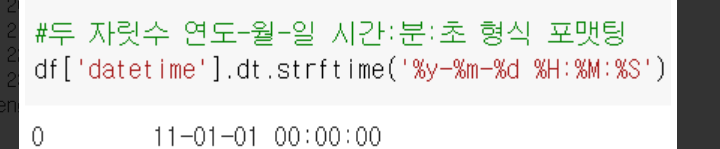

In [ ]:
pd.to_datetime(academy_student_workwheet_scoring_problem['ws_scoring.update_datetime']).dt.strftime('%y-%m-%d')

0           20-10-25
1           20-10-25
2           20-10-25
3           20-10-25
4           20-10-25
              ...   
10066302    22-10-13
10066303    22-10-13
10066304    22-10-13
10066305    22-10-13
10066306    22-10-13
Name: ws_scoring.update_datetime, Length: 10066307, dtype: object

In [ ]:
academy_student_workwheet_scoring_problem['date'] = pd.to_datetime(academy_student_workwheet_scoring_problem['ws_scoring.update_datetime']).dt.strftime('%y-%m-%d')
academy_student_workwheet_scoring_problem['year'] = pd.to_datetime(academy_student_workwheet_scoring_problem['ws_scoring.update_datetime']).dt.year

In [ ]:
academy_student_workwheet_scoring_problem

,academy.id,academy.status,academy.create_datetime,academy.runway,student.id,student.school_type,student.grade,student.status,s_ws.id,s_ws.worksheet_id,...,ws_scoring.id,ws_scoring.result,ws_scoring.update_datetime,ws_problem.id,ws_problem.worksheet_id,ws_problem.problem_id,ws_problem.ordering_number,ws_problem.type,date,year
0,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,22673,CORRECT,2020-10-25 15:08:06,146873314,5525992,252454,1,0,20-10-25,2020
1,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6915136,5525992,...,83242,CORRECT,2020-10-25 15:12:47,146873314,5525992,252454,1,0,20-10-25,2020
2,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,22674,WRONG,2020-10-25 15:08:06,146873315,5525992,252438,2,0,20-10-25,2020
3,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6915136,5525992,...,83243,CORRECT,2020-10-25 15:12:47,146873315,5525992,252438,2,0,20-10-25,2020
4,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,22675,WRONG,2020-10-25 15:08:06,146873316,5525992,252484,3,0,20-10-25,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10066302,D5627,PAY_INPROGRESS,2019-06-14 00:00:00,1252,I319633,3,3,0,27874289,23048621,...,649389341,CORRECT,2022-10-13 21:50:55,648494099,23048621,651915,4,0,22-10-13,2022
10066303,D5627,PAY_INPROGRESS,2019-06-14 00:00:00,1252,I319633,3,3,0,27874289,23048621,...,649389342,CORRECT,2022-10-13 21:50:58,648494100,23048621,280677,5,0,22-10-13,2022
10066304,D5627,PAY_INPROGRESS,2019-06-14 00:00:00,1252,I319633,3,3,0,27874289,23048621,...,649389344,CORRECT,2022-10-13 21:51:02,648494102,23048621,280667,7,0,22-10-13,2022
10066305,D5627,PAY_INPROGRESS,2019-06-14 00:00:00,1252,I319633,3,3,0,27874289,23048621,...,649389345,CORRECT,2022-10-13 21:51:03,648494103,23048621,280676,8,0,22-10-13,2022


In [ ]:
academy_student_workwheet_scoring_problem['recorded_grade'] = 0

for i in tqdm(range(len(academy_student_workwheet_scoring_problem))):
  academy_student_workwheet_scoring_problem['recorded_grade'][i] = int(academy_student_workwheet_scoring_problem['year'][i])%4 + 1
academy_student_workwheet_scoring_problem

In [ ]:
academy_student_workwheet_scoring_problem.to_csv('/content/drive/MyDrive/teamC/Hanbin/data/academy_student_workwheet_scoring_problem.csv')

# problem

In [ ]:
problem = pd.read_csv('/content/drive/MyDrive/archive/sql_2_csv/problem.csv')
problem_concept = pd.read_csv('/content/drive/MyDrive/archive/sql_2_csv/problem_concept.csv')
problem_curriculum = pd.read_csv('/content/drive/MyDrive/archive/sql_2_csv/problem_curriculum.csv')
problem_curriculum_concept_cache = pd.read_csv('/content/drive/MyDrive/archive/sql_2_csv/problem_curriculum_concept_cache.csv')

In [ ]:
problem = problem[['id', 'problem_concept_id', 'group_code', 'level', 'type', 'correct_rate', 'create_datetime', 'update_datetime']]
problem.columns = ['p.id', 'p.problem_concept_id', 'p.group_code', 'p.level', 'p.type', 'p.correct_rate', 'p.create_datetime', 'p.update_datetime']
problem

,p.id,p.problem_concept_id,p.group_code,p.level,p.type,p.correct_rate,p.create_datetime,p.update_datetime
0,1,1693,NaN,4,0,90.6250,2021-10-26 00:21:06,2022-07-13 12:30:47
1,2,1696,NaN,2,1,47.2868,2021-10-26 00:21:06,2022-09-20 11:23:31
2,3,1693,NaN,2,2,87.7953,2021-10-26 00:21:06,2022-09-20 11:24:16
3,4,1693,NaN,2,0,93.2990,2021-10-26 00:21:06,2022-09-20 11:24:16
4,5,1696,NaN,2,2,89.2473,2021-10-26 00:21:06,2022-09-20 11:24:16
...,...,...,...,...,...,...,...,...
637523,700511,8827,NaN,3,0,70.0000,2022-10-12 00:00:00,2022-10-13 14:25:41
637524,700512,8708,NaN,4,0,50.0000,2022-10-12 00:00:00,2022-10-13 14:25:41
637525,700513,8800,NaN,4,0,50.0000,2022-10-12 00:00:00,2022-10-13 14:25:41
637526,700514,8756,NaN,4,2,50.0000,2022-10-12 00:00:00,2022-10-13 14:25:41


In [ ]:
academy_student_workwheet_scoring_problem_problem = pd.merge(academy_student_workwheet_scoring_problem, problem, left_on='ws_problem.problem_id', right_on='p.id', how='inner')
academy_student_workwheet_scoring_problem_problem = academy_student_workwheet_scoring_problem_problem[['academy.id', 'academy.status', 'academy.create_datetime', 'academy.runway', 
                                                                       'student.id', 'student.school_type', 'student.grade', 'student.status', 
                                                                       's_ws.id', 's_ws.worksheet_id','s_ws.create_datetime', 's_ws.open_datetime', 's_ws.solve_datetime',
                                                                       'ws_scoring.id', 'ws_scoring.result', 'ws_scoring.update_datetime',
                                                                       'ws_problem.id', 'ws_problem.worksheet_id', 'ws_problem.problem_id', 'ws_problem.ordering_number','ws_problem.type',
                                                                       'date', 'year',
                                                                       'p.id', 'p.problem_concept_id', 'p.group_code', 'p.level', 'p.type', 'p.correct_rate', 'p.create_datetime', 'p.update_datetime']]
academy_student_workwheet_scoring_problem_problem  

,academy.id,academy.status,academy.create_datetime,academy.runway,student.id,student.school_type,student.grade,student.status,s_ws.id,s_ws.worksheet_id,...,date,year,p.id,p.problem_concept_id,p.group_code,p.level,p.type,p.correct_rate,p.create_datetime,p.update_datetime
0,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,20-10-25,2020,252454,7471,2010.0,2,2,78.2441,2021-10-26 00:21:13,2021-10-26 20:36:53
1,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6915136,5525992,...,20-10-25,2020,252454,7471,2010.0,2,2,78.2441,2021-10-26 00:21:13,2021-10-26 20:36:53
2,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6931764,5540742,...,20-10-15,2020,252454,7471,2010.0,2,2,78.2441,2021-10-26 00:21:13,2021-10-26 20:36:53
3,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6931761,5540742,...,20-10-15,2020,252454,7471,2010.0,2,2,78.2441,2021-10-26 00:21:13,2021-10-26 20:36:53
4,D0409,PAY_INPROGRESS,2017-03-02,2086,I15492,3,3,1,6931765,5540742,...,20-10-21,2020,252454,7471,2010.0,2,2,78.2441,2021-10-26 00:21:13,2021-10-26 20:36:53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10066302,D6838,PAY_INPROGRESS,2019-11-07 00:00:00,1106,I457941,3,3,0,27827172,23022396,...,22-10-12,2022,554180,7403,4010.0,4,2,73.0435,2021-10-26 00:21:13,2022-09-20 11:23:31
10066303,D6838,PAY_INPROGRESS,2019-11-07 00:00:00,1106,I457941,3,3,0,27827172,23022396,...,22-10-12,2022,651480,7407,NaN,4,2,50.0000,2021-12-13 21:49:57,2022-09-30 12:09:21
10066304,D6838,PAY_INPROGRESS,2019-11-07 00:00:00,1106,I457941,3,3,0,27827172,23022396,...,22-10-12,2022,692609,7403,NaN,4,2,50.0000,2022-03-08 15:44:05,2022-09-20 11:23:31
10066305,D0424,PAY_INPROGRESS,2017-03-13 00:00:00,2075,I203146,3,3,0,27863899,23003137,...,22-10-13,2022,693585,7751,1010.0,1,2,90.0000,2022-04-29 16:00:44,2022-09-30 12:09:27


In [ ]:
academy_student_workwheet_scoring_problem_problem.columns

Index(['academy.id', 'academy.status', 'academy.create_datetime',
       'academy.runway', 'student.id', 'student.school_type', 'student.grade',
       'student.status', 's_ws.id', 's_ws.worksheet_id',
       's_ws.create_datetime', 's_ws.open_datetime', 's_ws.solve_datetime',
       'ws_scoring.id', 'ws_scoring.result', 'ws_scoring.update_datetime',
       'ws_problem.id', 'ws_problem.worksheet_id', 'ws_problem.problem_id',
       'ws_problem.ordering_number', 'ws_problem.type', 'date', 'year', 'p.id',
       'p.problem_concept_id', 'p.group_code', 'p.level', 'p.type',
       'p.correct_rate', 'p.create_datetime', 'p.update_datetime'],
      dtype='object')

In [ ]:
academy_student_workwheet_scoring_problem_problem.sort_values(by=['student.id', 'year'])

,academy.id,academy.status,academy.create_datetime,academy.runway,student.id,student.school_type,student.grade,student.status,s_ws.id,s_ws.worksheet_id,...,date,year,p.id,p.problem_concept_id,p.group_code,p.level,p.type,p.correct_rate,p.create_datetime,p.update_datetime
533,D2343,PAY_INPROGRESS,2018-02-23 00:00:00,1728,I100008,3,3,2,7208064,5790573,...,20-11-14,2020,253429,7481,NaN,3,2,68.0429,2021-10-26 00:21:13,2022-09-20 11:23:31
1217,D2343,PAY_INPROGRESS,2018-02-23 00:00:00,1728,I100008,3,3,2,7208064,5790573,...,20-11-14,2020,276441,7538,2040.0,2,2,81.7437,2021-10-26 00:21:14,2021-12-01 18:11:28
2578,D2343,PAY_INPROGRESS,2018-02-23 00:00:00,1728,I100008,3,3,2,7208063,5790588,...,20-11-07,2020,501000,7576,3050.0,3,2,40.6877,2021-10-26 00:21:14,2021-10-15 20:16:43
8155,D2343,PAY_INPROGRESS,2018-02-23 00:00:00,1728,I100008,3,3,2,7487436,6035122,...,20-11-30,2020,442355,7479,3030.0,3,0,51.7212,2021-10-26 00:21:13,2021-11-18 18:28:44
10680,D2343,PAY_INPROGRESS,2018-02-23 00:00:00,1728,I100008,3,3,2,7487436,6035122,...,20-11-30,2020,441600,7499,3020.0,3,0,51.5582,2021-10-26 00:21:14,2021-11-27 11:20:28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9664937,D3399,PAY_INPROGRESS,2018-03-12 00:00:00,1711,IB163,3,3,1,8508138,6878898,...,21-03-18,2021,511876,8684,3140.0,3,0,68.0000,2021-10-26 00:21:16,2022-03-24 10:56:11
9669375,D3399,PAY_INPROGRESS,2018-03-12 00:00:00,1711,IB163,3,3,1,8591538,6948930,...,21-03-18,2021,438717,8667,NaN,3,2,40.7692,2021-10-26 00:21:16,2022-06-17 17:40:58
9685015,D3399,PAY_INPROGRESS,2018-03-12 00:00:00,1711,IB163,3,3,1,8571574,6932603,...,21-03-18,2021,512400,8549,2090.0,2,2,67.1642,2021-10-26 00:21:15,2022-03-24 10:55:59
9707230,D3399,PAY_INPROGRESS,2018-03-12 00:00:00,1711,IB163,3,3,1,8831630,7145616,...,21-03-18,2021,436281,8549,2150.0,2,0,82.0068,2021-10-26 00:21:15,2022-03-24 10:56:00


In [ ]:
academy_student_workwheet_scoring_problem_problem.to_csv('/content/drive/MyDrive/teamC/Hanbin/data/academy_student_workwheet_scoring_problem_problem.csv')

# problem concept

In [ ]:
problem_concept.columns

Index(['Unnamed: 0', 'id', 'problem_curriculum_id', 'school', 'grade',
       'semester', 'name', 'sequence', 'correct_rate', 'create_datetime',
       'update_datetime'],
      dtype='object')

In [ ]:
problem_concept = problem_concept[['id', 'problem_curriculum_id', 'school', 'grade','semester', 'name', 'sequence', 'correct_rate', 'create_datetime','update_datetime']]
problem_concept.columns = ['p_cpt.id', 'p_cpt.problem_curriculum_id', 'p_cpt.school', 'p_cpt.grade','p_cpt.semester', 'p_cpt.name', 'p_cpt.sequence', 'p_cpt.correct_rate', 'p_cpt.create_datetime','p_cpt.update_datetime']
problem_concept


,p_cpt.id,p_cpt.problem_curriculum_id,p_cpt.school,p_cpt.grade,p_cpt.semester,p_cpt.name,p_cpt.sequence,p_cpt.correct_rate,p_cpt.create_datetime,p_cpt.update_datetime
0,1,1,1,1,1,미분류,1,65.9813,2021-10-26 00:20:37,2021-10-26 00:20:37
1,2,2415,2,1,2,줄기와 잎 정하기,1,88.5755,2021-10-26 00:20:38,2021-10-26 00:20:38
2,3,2415,2,1,2,자료의 최고와 최저 구하기,2,90.8241,2021-10-26 00:20:38,2021-10-26 00:20:38
3,4,2415,2,1,2,줄기와 잎그림에서 조건에 맞게 빈칸 채우기,3,84.9490,2021-10-26 00:20:38,2021-10-26 00:20:38
4,5,2415,2,1,2,특정 줄기의 잎 찾기,4,94.4262,2021-10-26 00:20:38,2021-10-26 00:20:38
...,...,...,...,...,...,...,...,...,...,...
9039,9186,2209,1,4,2,사다리꼴 그리기,2,70.2656,2019-09-09 12:46:11,2022-06-10 10:58:44
9040,9187,3786,1,4,2,평행사변형 그리기,2,69.9857,2019-09-09 12:46:11,2022-06-10 10:58:44
9041,9188,3787,1,4,2,거리가 주어진 평행선 긋기,3,57.1688,2019-09-09 12:46:11,2022-06-10 10:58:44
9042,9189,2216,1,4,2,소수 두 자리 수의 각 자리 숫자가 나타내는 수,4,76.9549,2019-09-09 12:46:11,2022-06-10 10:58:44


In [ ]:
academy_student_workwheet_scoring_problem_problem_cpt = pd.merge(academy_student_workwheet_scoring_problem_problem, problem_concept, left_on='p.problem_concept_id', right_on='p_cpt.id', how='inner')
academy_student_workwheet_scoring_problem_problem_cpt = academy_student_workwheet_scoring_problem_problem_cpt[['academy.id', 'academy.status', 'academy.create_datetime', 'academy.runway', 
                                                                       'student.id', 'student.school_type', 'student.grade', 'student.status', 
                                                                       's_ws.id', 's_ws.worksheet_id','s_ws.create_datetime', 's_ws.open_datetime', 's_ws.solve_datetime',
                                                                       'ws_scoring.id', 'ws_scoring.result', 'ws_scoring.update_datetime',
                                                                       'ws_problem.id', 'ws_problem.worksheet_id', 'ws_problem.problem_id', 'ws_problem.ordering_number','ws_problem.type',
                                                                       'date', 'year',
                                                                       'p.id',  'p.group_code', 'p.level', 'p.type', 'p.correct_rate', 'p.create_datetime', 'p.update_datetime',
                                                                       'p_cpt.id', 'p_cpt.problem_curriculum_id', 'p_cpt.school', 'p_cpt.grade','p_cpt.semester', 'p_cpt.name', 'p_cpt.sequence', 'p_cpt.correct_rate', 'p_cpt.create_datetime','p_cpt.update_datetime']]
academy_student_workwheet_scoring_problem_problem_cpt 

,academy.id,academy.status,academy.create_datetime,academy.runway,student.id,student.school_type,student.grade,student.status,s_ws.id,s_ws.worksheet_id,...,p_cpt.id,p_cpt.problem_curriculum_id,p_cpt.school,p_cpt.grade,p_cpt.semester,p_cpt.name,p_cpt.sequence,p_cpt.correct_rate,p_cpt.create_datetime,p_cpt.update_datetime
0,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,5525992,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
1,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6915136,5525992,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
2,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6931764,5540742,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
3,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6931761,5540742,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
4,D0409,PAY_INPROGRESS,2017-03-02,2086,I15492,3,3,1,6931765,5540742,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10066302,D11960,PAY_INPROGRESS,2021-06-24 10:40:15,510,I342262,3,3,0,14412532,11977497,...,3575,3653,3,3,1,미분가능일 조건,3,63.4014,2021-10-26 00:20:39,2021-10-26 00:20:39
10066303,D11960,PAY_INPROGRESS,2021-06-24 10:40:15,510,I342262,3,3,0,14412532,11977497,...,3575,3653,3,3,1,미분가능일 조건,3,63.4014,2021-10-26 00:20:39,2021-10-26 00:20:39
10066304,D4969,PAY_INPROGRESS,2019-04-01 00:00:00,1326,I438579,3,3,0,14455719,12016328,...,2577,3524,3,1,1,공통근을 갖는 이차방정식,7,55.8360,2021-10-26 00:20:39,2021-10-26 00:20:39
10066305,D8216,PAY_INPROGRESS,2020-04-02 00:00:00,959,I203077,3,3,1,14618044,12152638,...,3060,3604,3,2,1,∞/∞ 꼴의 극한; 로그를 포함한 식,3,53.0114,2021-10-26 00:20:39,2021-10-26 00:20:39


In [ ]:
academy_student_workwheet_scoring_problem_problem_cpt.to_csv('/content/drive/MyDrive/teamC/Hanbin/data/academy_student_workwheet_scoring_problem_problem_cpt.csv')

# 집계

In [ ]:
academy_student_workwheet_scoring_problem_problem_cpt = pd.read_csv('/content/drive/MyDrive/teamC/Hanbin/data/academy_student_workwheet_scoring_problem_problem_cpt.csv')
academy_student_workwheet_scoring_problem_problem_cpt

,Unnamed: 0,academy.id,academy.status,academy.create_datetime,academy.runway,student.id,student.school_type,student.grade,student.status,s_ws.id,...,p_cpt.id,p_cpt.problem_curriculum_id,p_cpt.school,p_cpt.grade,p_cpt.semester,p_cpt.name,p_cpt.sequence,p_cpt.correct_rate,p_cpt.create_datetime,p_cpt.update_datetime
0,0,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
1,1,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6915136,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
2,2,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6931764,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
3,3,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6931761,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
4,4,D0409,PAY_INPROGRESS,2017-03-02,2086,I15492,3,3,1,6931765,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10066302,10066302,D11960,PAY_INPROGRESS,2021-06-24 10:40:15,510,I342262,3,3,0,14412532,...,3575,3653,3,3,1,미분가능일 조건,3,63.4014,2021-10-26 00:20:39,2021-10-26 00:20:39
10066303,10066303,D11960,PAY_INPROGRESS,2021-06-24 10:40:15,510,I342262,3,3,0,14412532,...,3575,3653,3,3,1,미분가능일 조건,3,63.4014,2021-10-26 00:20:39,2021-10-26 00:20:39
10066304,10066304,D4969,PAY_INPROGRESS,2019-04-01 00:00:00,1326,I438579,3,3,0,14455719,...,2577,3524,3,1,1,공통근을 갖는 이차방정식,7,55.8360,2021-10-26 00:20:39,2021-10-26 00:20:39
10066305,10066305,D8216,PAY_INPROGRESS,2020-04-02 00:00:00,959,I203077,3,3,1,14618044,...,3060,3604,3,2,1,∞/∞ 꼴의 극한; 로그를 포함한 식,3,53.0114,2021-10-26 00:20:39,2021-10-26 00:20:39


In [ ]:
#학생의 연도별 난이도별 정답률 
student_scoring_rate_per_year_level = academy_student_workwheet_scoring_problem_problem_cpt.groupby(['student.id', 'year', 'p.level', 'ws_scoring.result'])['p.id'].count()
student_scoring_rate_per_year_level = pd.DataFrame(student_scoring_rate_per_year_level).pivot_table(index=['student.id','year', 'p.level'], columns='ws_scoring.result', values='p.id')
student_scoring_rate_per_year_level = student_scoring_rate_per_year_level.fillna(0)
student_scoring_rate_per_year_level

ws_scoring.result        CORRECT  WRONG
student.id year p.level                
I100008    2020 1          176.0   34.0
                2          500.0  124.0
                3          446.0  178.0
                4           99.0   60.0
                5            5.0    6.0
...                          ...    ...
IB163      2021 1           11.0    0.0
                2           74.0   10.0
                3          115.0   20.0
                4           30.0    9.0
                5            2.0    1.0

[96356 rows x 2 columns]

In [ ]:
student_scoring_rate_per_year_level['correct_rate'] = student_scoring_rate_per_year_level['CORRECT'] / (student_scoring_rate_per_year_level['CORRECT'] + student_scoring_rate_per_year_level['WRONG'])
student_scoring_rate_per_year_level

ws_scoring.result        CORRECT  WRONG  correct_rate
student.id year p.level                              
I100008    2020 1          176.0   34.0      0.838095
                2          500.0  124.0      0.801282
                3          446.0  178.0      0.714744
                4           99.0   60.0      0.622642
                5            5.0    6.0      0.454545
...                          ...    ...           ...
IB163      2021 1           11.0    0.0      1.000000
                2           74.0   10.0      0.880952
                3          115.0   20.0      0.851852
                4           30.0    9.0      0.769231
                5            2.0    1.0      0.666667

[96356 rows x 3 columns]

In [ ]:
student_scoring_rate_per_year_level.index[0][2]

1

In [ ]:
student_scoring_rate_per_year_level = student_scoring_rate_per_year_level.reset_index()
student_scoring_rate_per_year_level

ws_scoring.result,student.id,year,p.level,CORRECT,WRONG,correct_rate
0,I100008,2020,1,176.0,34.0,0.838095
1,I100008,2020,2,500.0,124.0,0.801282
2,I100008,2020,3,446.0,178.0,0.714744
3,I100008,2020,4,99.0,60.0,0.622642
4,I100008,2020,5,5.0,6.0,0.454545
...,...,...,...,...,...,...
96351,IB163,2021,1,11.0,0.0,1.000000
96352,IB163,2021,2,74.0,10.0,0.880952
96353,IB163,2021,3,115.0,20.0,0.851852
96354,IB163,2021,4,30.0,9.0,0.769231


In [ ]:
student_scoring_rate_per_year_level['score'] = student_scoring_rate_per_year_level['correct_rate'] * student_scoring_rate_per_year_level['p.level']
student_scoring_rate_per_year_level['solve_num'] = student_scoring_rate_per_year_level['CORRECT'] + student_scoring_rate_per_year_level['WRONG']

student_scoring_rate_per_year_level

ws_scoring.result,student.id,year,p.level,CORRECT,WRONG,correct_rate,score,solve_num
0,I100008,2020,1,176.0,34.0,0.838095,0.838095,210.0
1,I100008,2020,2,500.0,124.0,0.801282,1.602564,624.0
2,I100008,2020,3,446.0,178.0,0.714744,2.144231,624.0
3,I100008,2020,4,99.0,60.0,0.622642,2.490566,159.0
4,I100008,2020,5,5.0,6.0,0.454545,2.272727,11.0
...,...,...,...,...,...,...,...,...
96351,IB163,2021,1,11.0,0.0,1.000000,1.000000,11.0
96352,IB163,2021,2,74.0,10.0,0.880952,1.761905,84.0
96353,IB163,2021,3,115.0,20.0,0.851852,2.555556,135.0
96354,IB163,2021,4,30.0,9.0,0.769231,3.076923,39.0


In [ ]:
student_scoring_rate_per_year_level_score = pd.DataFrame(student_scoring_rate_per_year_level.groupby(['student.id', 'year'])['score', 'solve_num'].sum())
student_scoring_rate_per_year_level_score = student_scoring_rate_per_year_level_score.reset_index()
student_scoring_rate_per_year_level_score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


ws_scoring.result,student.id,year,score,solve_num
0,I100008,2020,9.348183,1628.0
1,I100008,2021,8.580949,3724.0
2,I100067,2020,10.129015,579.0
3,I100067,2021,11.962930,3165.0
4,I100067,2022,9.871144,622.0
...,...,...,...,...
22796,I99963,2021,7.510823,90.0
22797,IB113,2020,5.977778,40.0
22798,IB113,2021,6.595556,48.0
22799,IB123,2021,7.862458,283.0


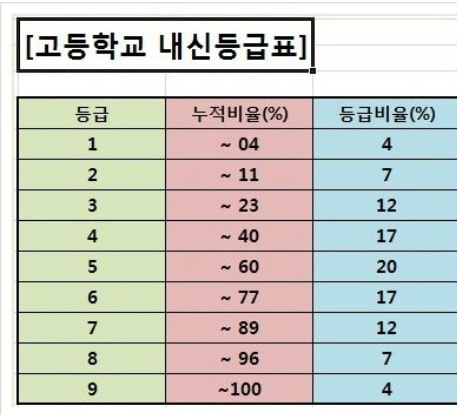

In [ ]:
def rating(x):
  if x <= 0.04:
    return 9
  elif x <= 0.11:
    return 8
  elif x <= 0.23:
    return 7
  elif x <= 0.40:
    return 6
  elif x <= 0.60:
    return 5
  elif x <= 0.77:
    return 4
  elif x <= 0.89:
    return 3
  elif x <= 0.96:
    return 2
  elif x <= 1.00:
    return 1              

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_ = MinMaxScaler()
scaler_.fit(pd.DataFrame(student_scoring_rate_per_year_level_score['solve_num']))
student_scoring_rate_per_year_level_score['scaled_solve_num'] = scaler_.transform(pd.DataFrame(student_scoring_rate_per_year_level_score['solve_num']))


scaler_.fit(pd.DataFrame(student_scoring_rate_per_year_level_score['score']))
student_scoring_rate_per_year_level_score['scaled_score'] = scaler_.transform(pd.DataFrame(student_scoring_rate_per_year_level_score['score']))


student_scoring_rate_per_year_level_score['score_rating'] = student_scoring_rate_per_year_level_score['scaled_score']
student_scoring_rate_per_year_level_score['score_rating'] = student_scoring_rate_per_year_level_score['score_rating'].apply(rating)


student_scoring_rate_per_year_level_score['solve_num_rating'] = student_scoring_rate_per_year_level_score['scaled_solve_num']
student_scoring_rate_per_year_level_score['solve_num_rating'] = student_scoring_rate_per_year_level_score['solve_num_rating'].apply(rating)

student_scoring_rate_per_year_level_score

ws_scoring.result,student.id,year,score,solve_num,scaled_solve_num,scaled_score,score_rating,solve_num_rating
0,I100008,2020,9.348183,1628.0,0.117609,0.623212,4,7
1,I100008,2021,8.580949,3724.0,0.269120,0.572063,5,6
2,I100067,2020,10.129015,579.0,0.041781,0.675268,4,8
3,I100067,2021,11.962930,3165.0,0.228712,0.797529,3,7
4,I100067,2022,9.871144,622.0,0.044889,0.658076,4,8
...,...,...,...,...,...,...,...,...
22796,I99963,2021,7.510823,90.0,0.006433,0.500722,5,9
22797,IB113,2020,5.977778,40.0,0.002819,0.398519,6,9
22798,IB113,2021,6.595556,48.0,0.003397,0.439704,5,9
22799,IB123,2021,7.862458,283.0,0.020385,0.524164,5,9


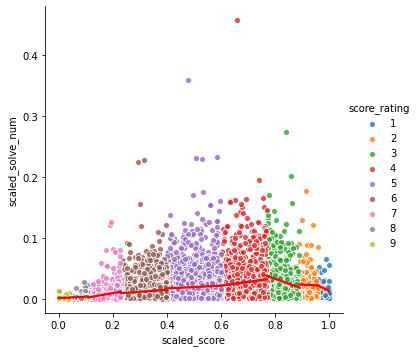

In [ ]:
# 2020
# sns.scatterplot(data=student_scoring_rate_per_year_level_score[student_scoring_rate_per_year_level_score['year'] == 2020], x="scaled_score", y="scaled_solve_num")
sns.lmplot(x="scaled_score", y="scaled_solve_num", 
           data=student_scoring_rate_per_year_level_score[student_scoring_rate_per_year_level_score['year'] == 2020], 
           line_kws={'color':"red"},scatter_kws={'edgecolor':"white"}, hue = 'score_rating')

In [ ]:
from statsmodels.formula.api import ols

res = ols('scaled_score ~ scaled_solve_num', 
          data=student_scoring_rate_per_year_level_score[student_scoring_rate_per_year_level_score['year'] == 2020]).fit() 
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           scaled_score   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     531.9
Date:                Fri, 18 Nov 2022   Prob (F-statistic):          1.66e-113
Time:                        12:18:07   Log-Likelihood:                 1409.4
No. Observations:                7020   AIC:                            -2815.
Df Residuals:                    7018   BIC:                            -2801.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4426      0.003    150.256      0.000       0.437       0.448
scaled_solve_num     2.2054      0.096     23.063      0.000       2.018       2.393
==============================================================================
Omnibus:                       97.739   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.641
Skew:                           0.221   Prob(JB):                     1.54e-19
Kurtosis:                       2.681   Cond. No.                         40.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

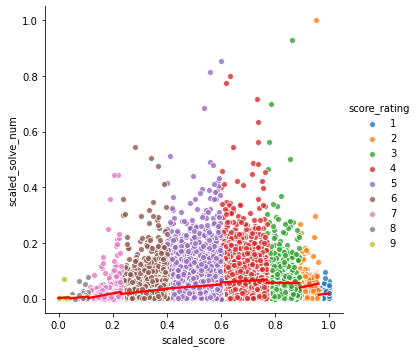

In [ ]:
# 2021
# sns.scatterplot(data=student_scoring_rate_per_year_level_score[student_scoring_rate_per_year_level_score['year'] == 2021], x="scaled_score", y="scaled_solve_num", )
sns.lmplot(x="scaled_score", y="scaled_solve_num", 
           data=student_scoring_rate_per_year_level_score[student_scoring_rate_per_year_level_score['year'] == 2021], 
           line_kws={'color':"red"},scatter_kws={'edgecolor':"white"}, hue = 'score_rating')

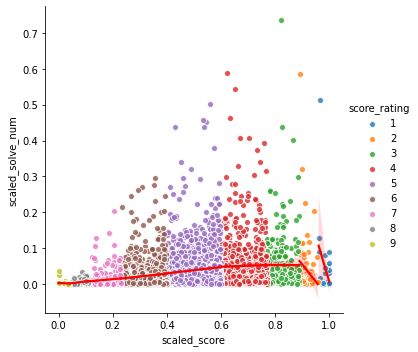

In [ ]:
# 2022
# sns.scatterplot(data=student_scoring_rate_per_year_level_score[student_scoring_rate_per_year_level_score['year'] == 2022], x="scaled_score", y="scaled_solve_num", )
sns.lmplot(x="scaled_score", y="scaled_solve_num", 
           data=student_scoring_rate_per_year_level_score[student_scoring_rate_per_year_level_score['year'] == 2022], 
           line_kws={'color':"red"},scatter_kws={'edgecolor':"white"}, hue = 'score_rating')

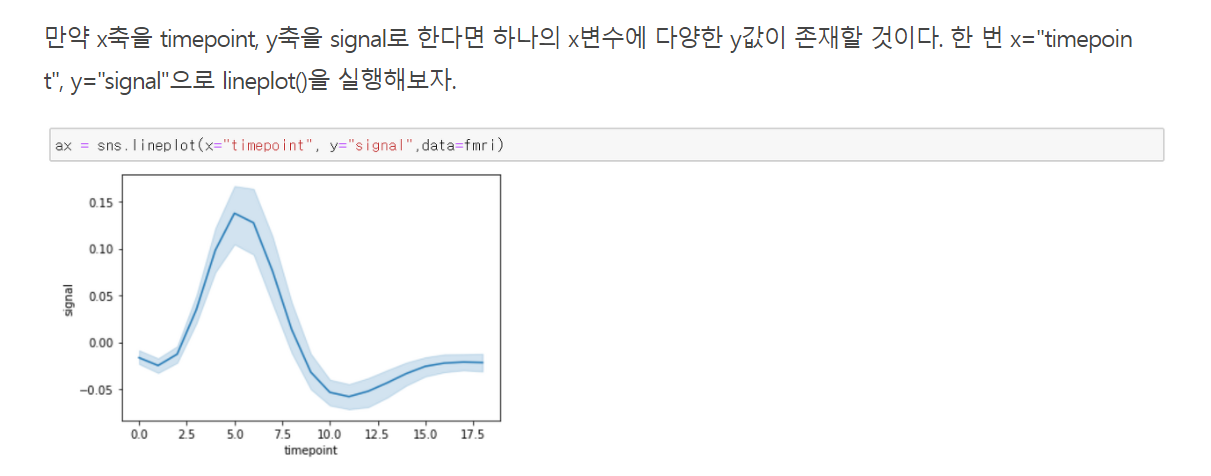

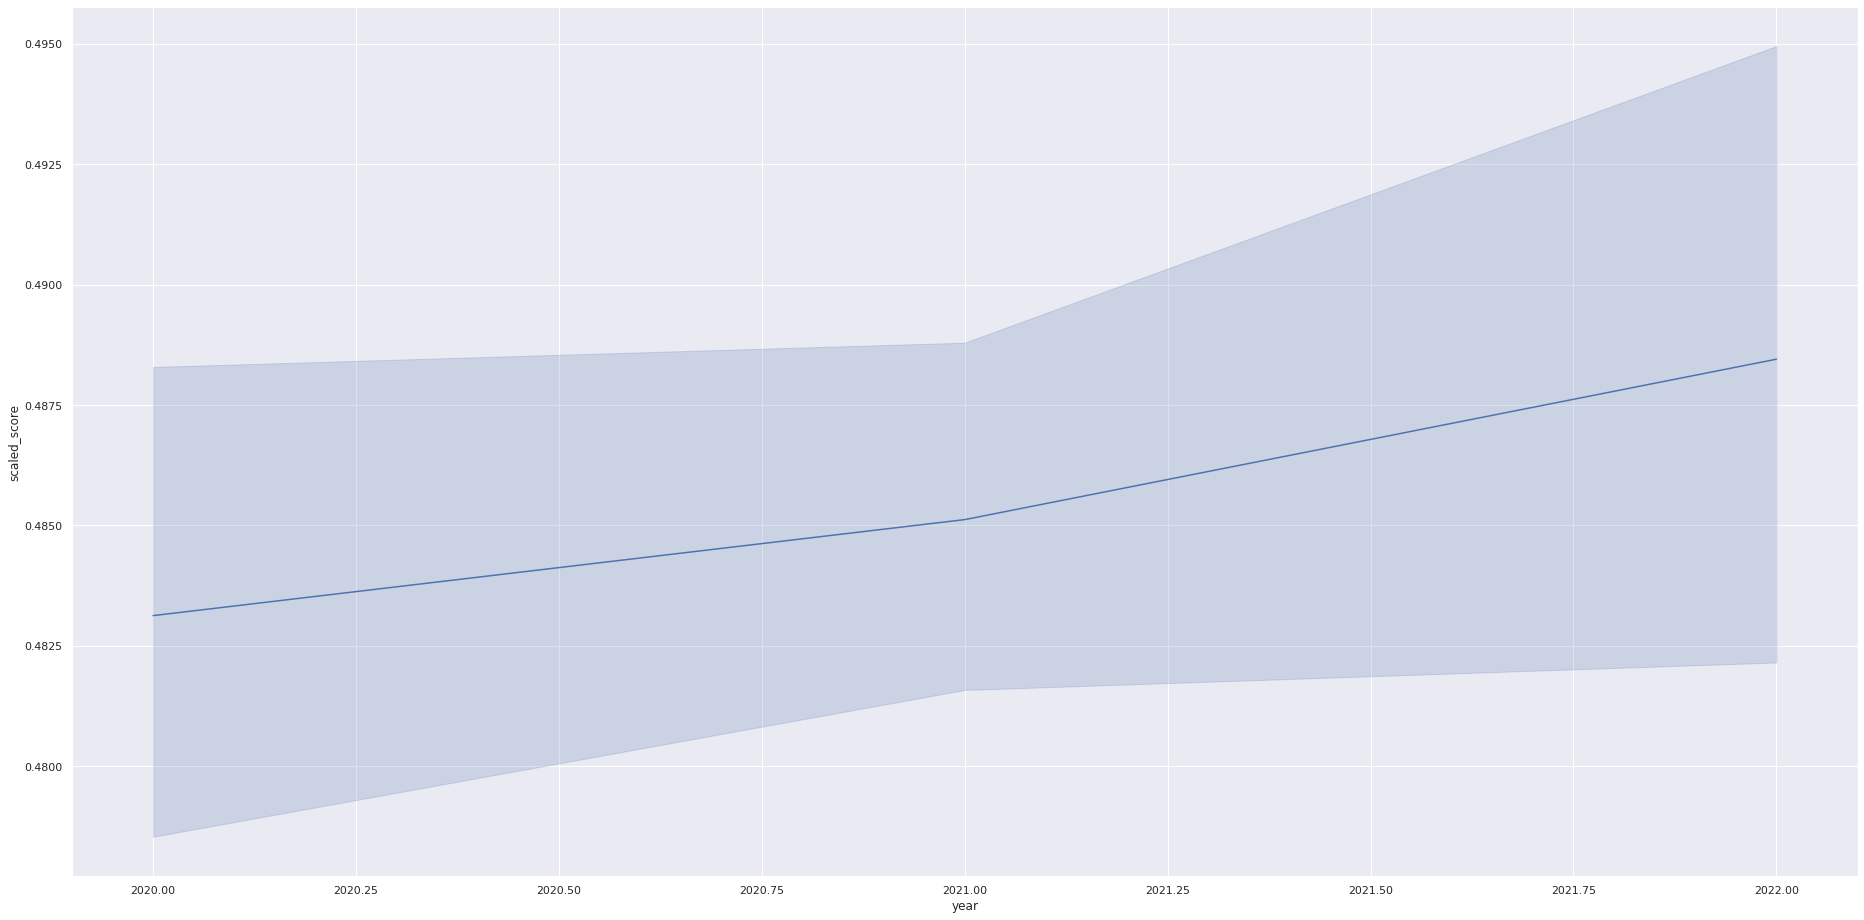

In [ ]:
sns.lineplot(x="year", y="scaled_score", 
           data=student_scoring_rate_per_year_level_score[student_scoring_rate_per_year_level_score['year'] != 2000])
           #,hue = 'score_rating')

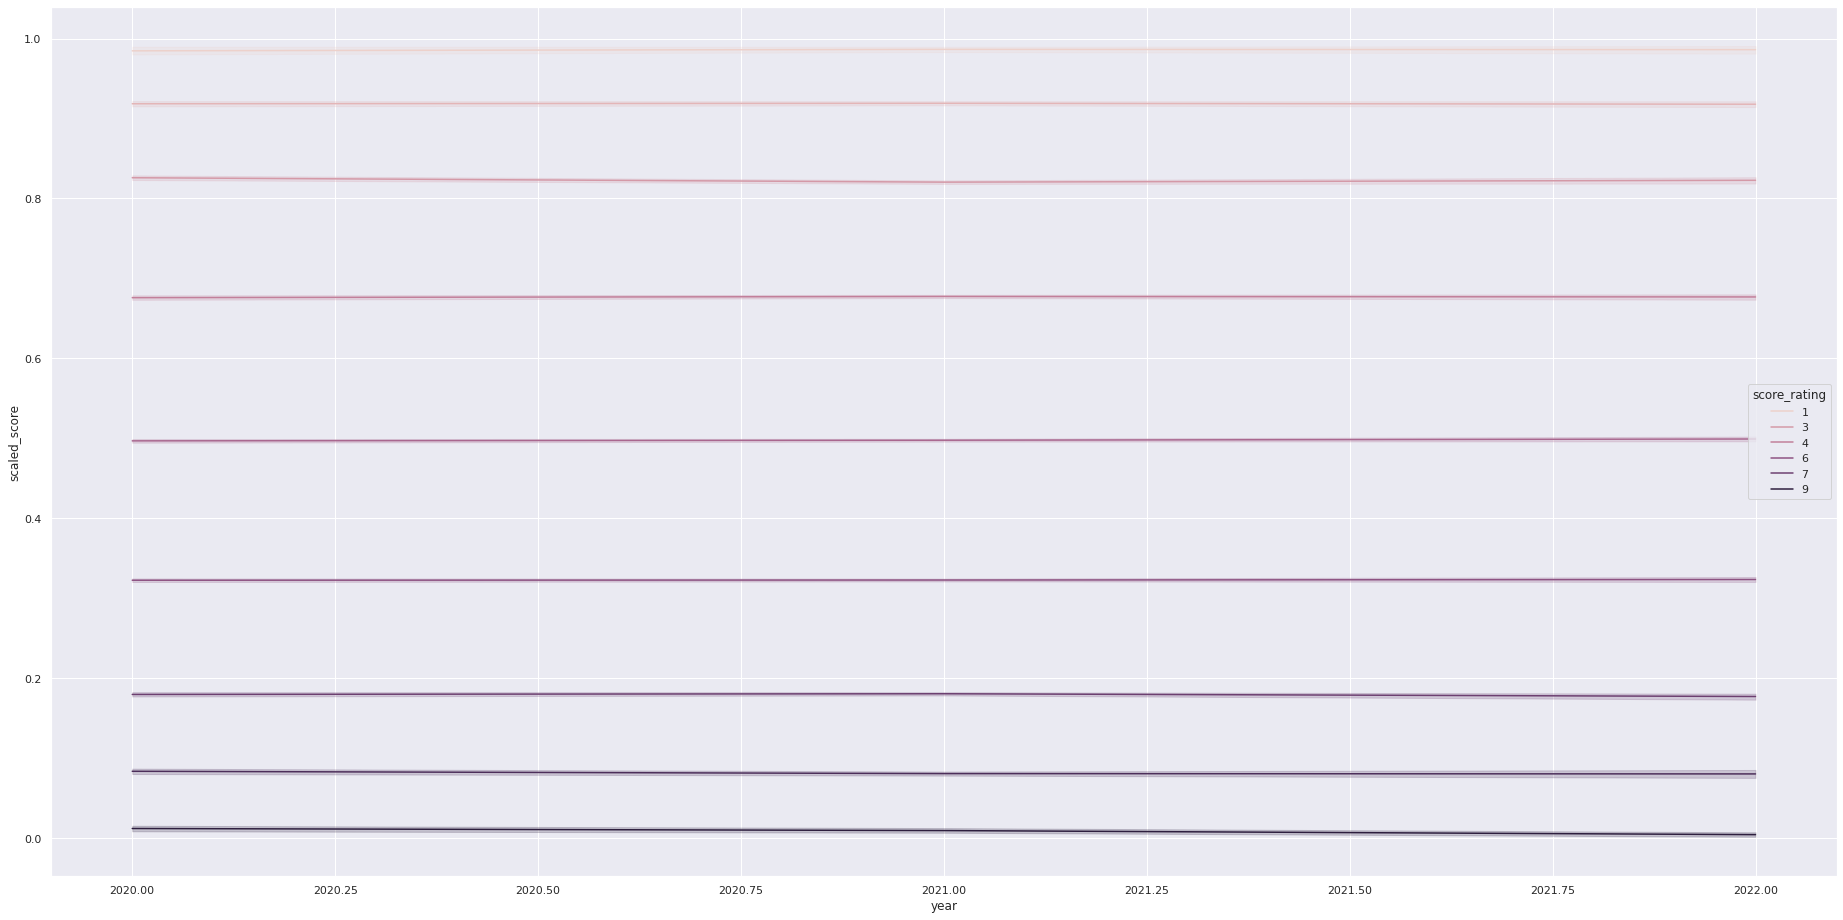

In [ ]:
sns.lineplot(x="year", y="scaled_score", 
           data=student_scoring_rate_per_year_level_score[student_scoring_rate_per_year_level_score['year'] != 2000]
           ,hue = 'score_rating')

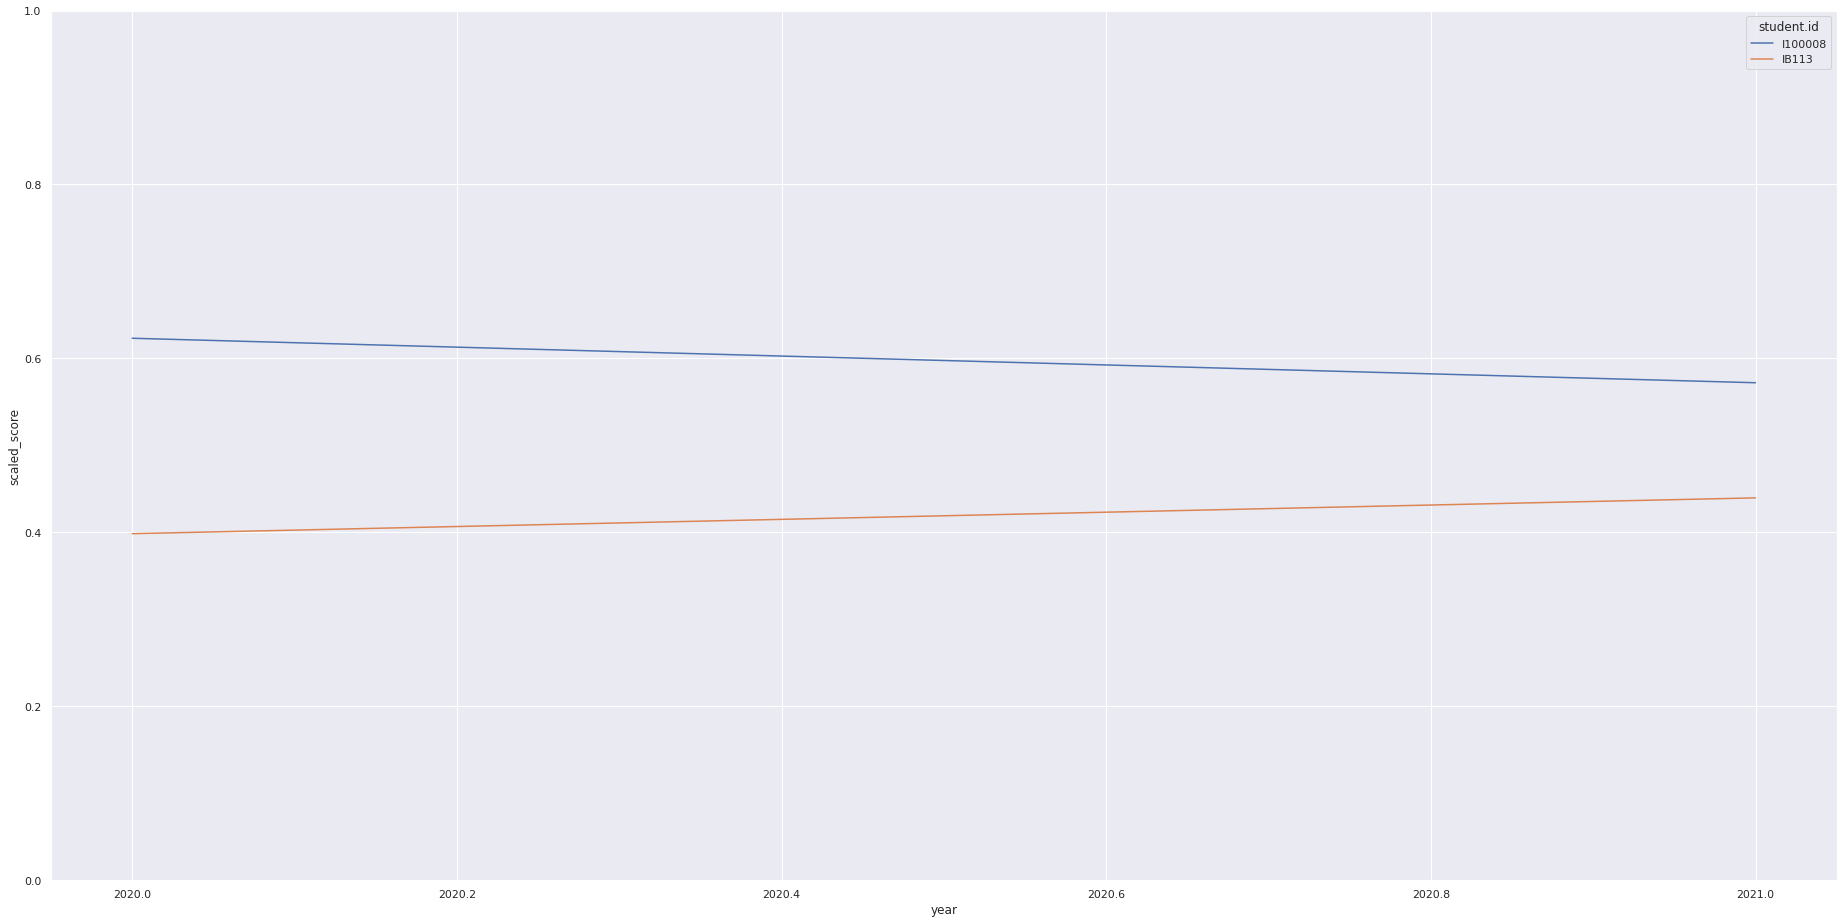

In [ ]:
import matplotlib.pyplot as plt

plt.ylim(0.0, 1.0)
sns.lineplot(x="year", y="scaled_score", 
           data=student_scoring_rate_per_year_level_score[(student_scoring_rate_per_year_level_score['student.id'] == 'I100008') | (student_scoring_rate_per_year_level_score['student.id'] == 'IB113')],
           hue = 'student.id')

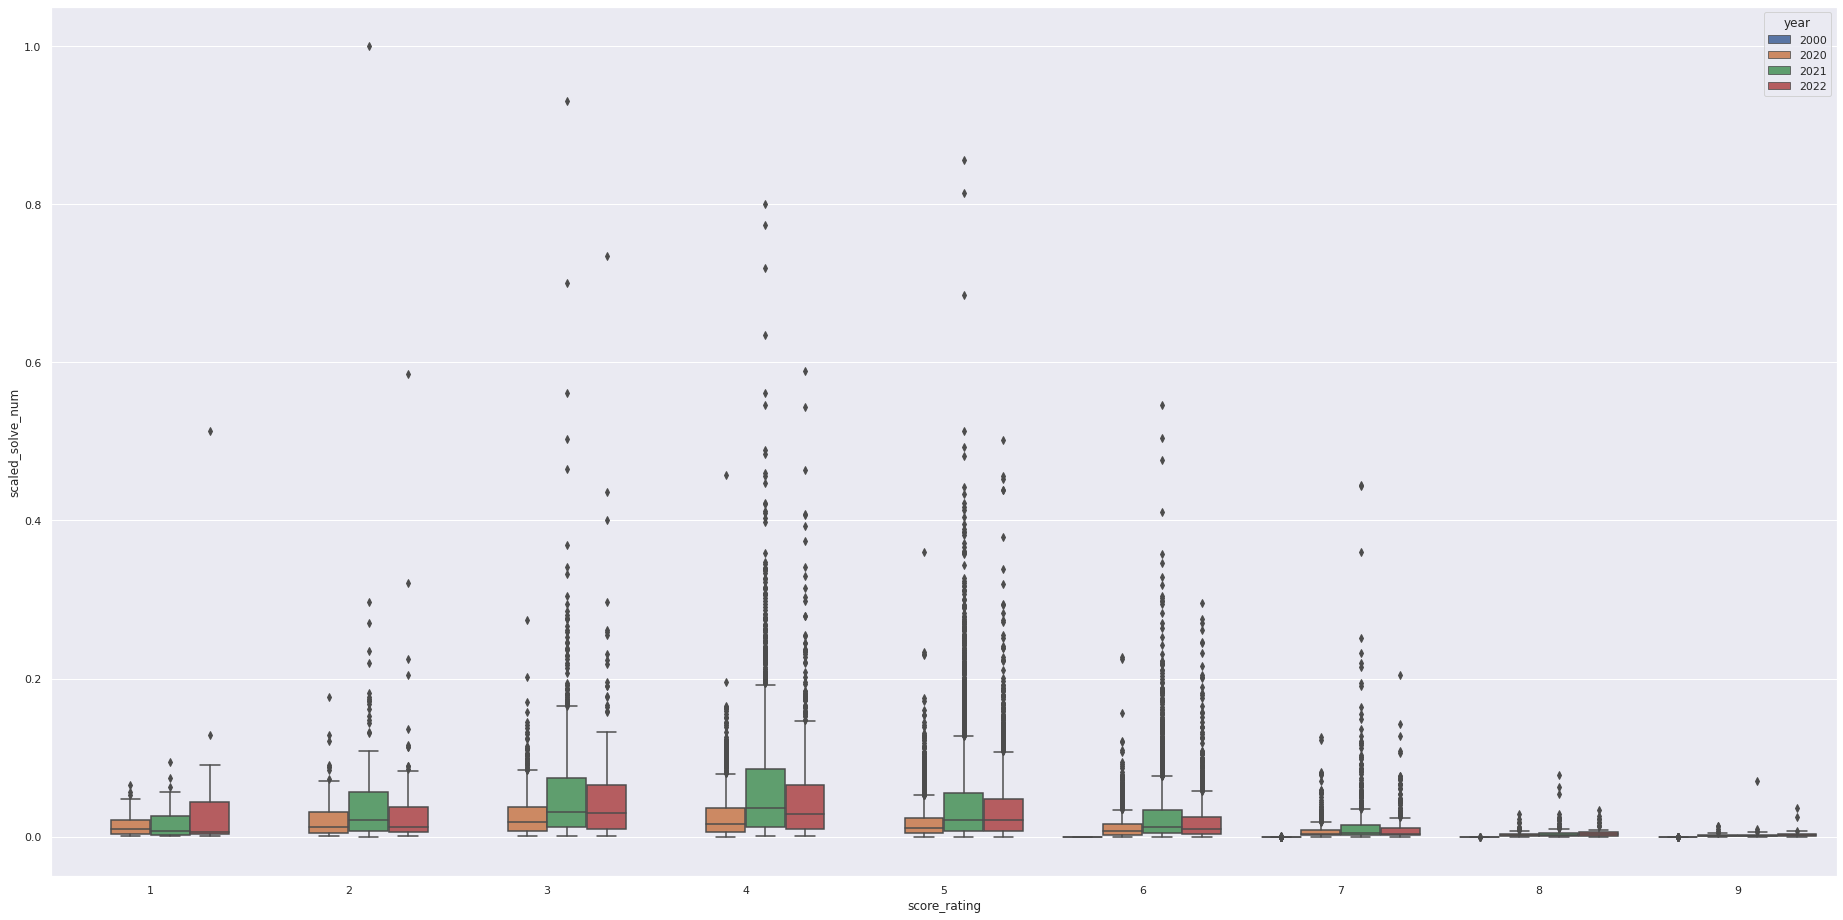

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(32,8)})
sns.boxplot(x = student_scoring_rate_per_year_level_score["score_rating"], 
            y=student_scoring_rate_per_year_level_score["scaled_solve_num"],  
            hue = student_scoring_rate_per_year_level_score['year'])



# 일자별 scoring

In [ ]:
def rating(x):
  if x <= 0.04:
    return 9
  elif x <= 0.11:
    return 8
  elif x <= 0.23:
    return 7
  elif x <= 0.40:
    return 6
  elif x <= 0.60:
    return 5
  elif x <= 0.77:
    return 4
  elif x <= 0.89:
    return 3
  elif x <= 0.96:
    return 2
  elif x <= 1.00:
    return 1   

In [ ]:
academy_student_workwheet_scoring_problem_problem_cpt

,Unnamed: 0,academy.id,academy.status,academy.create_datetime,academy.runway,student.id,student.school_type,student.grade,student.status,s_ws.id,...,p_cpt.id,p_cpt.problem_curriculum_id,p_cpt.school,p_cpt.grade,p_cpt.semester,p_cpt.name,p_cpt.sequence,p_cpt.correct_rate,p_cpt.create_datetime,p_cpt.update_datetime
0,0,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
1,1,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6915136,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
2,2,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6931764,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
3,3,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6931761,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
4,4,D0409,PAY_INPROGRESS,2017-03-02,2086,I15492,3,3,1,6931765,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10066302,10066302,D11960,PAY_INPROGRESS,2021-06-24 10:40:15,510,I342262,3,3,0,14412532,...,3575,3653,3,3,1,미분가능일 조건,3,63.4014,2021-10-26 00:20:39,2021-10-26 00:20:39
10066303,10066303,D11960,PAY_INPROGRESS,2021-06-24 10:40:15,510,I342262,3,3,0,14412532,...,3575,3653,3,3,1,미분가능일 조건,3,63.4014,2021-10-26 00:20:39,2021-10-26 00:20:39
10066304,10066304,D4969,PAY_INPROGRESS,2019-04-01 00:00:00,1326,I438579,3,3,0,14455719,...,2577,3524,3,1,1,공통근을 갖는 이차방정식,7,55.8360,2021-10-26 00:20:39,2021-10-26 00:20:39
10066305,10066305,D8216,PAY_INPROGRESS,2020-04-02 00:00:00,959,I203077,3,3,1,14618044,...,3060,3604,3,2,1,∞/∞ 꼴의 극한; 로그를 포함한 식,3,53.0114,2021-10-26 00:20:39,2021-10-26 00:20:39


In [ ]:
student_scoring_rate_per_year_level = academy_student_workwheet_scoring_problem_problem_cpt.groupby(['student.id', 'year', 'date', 'p.level', 'ws_scoring.result'])['p.id'].count()
student_scoring_rate_per_year_level = pd.DataFrame(student_scoring_rate_per_year_level).pivot_table(index=['student.id','year', 'date', 'p.level'], columns='ws_scoring.result', values='p.id')
student_scoring_rate_per_year_level = student_scoring_rate_per_year_level.fillna(0)
student_scoring_rate_per_year_level['correct_rate'] = student_scoring_rate_per_year_level['CORRECT'] / (student_scoring_rate_per_year_level['CORRECT'] + student_scoring_rate_per_year_level['WRONG'])
student_scoring_rate_per_year_level = student_scoring_rate_per_year_level.reset_index()
student_scoring_rate_per_year_level['score'] = student_scoring_rate_per_year_level['correct_rate'] * student_scoring_rate_per_year_level['p.level']
student_scoring_rate_per_year_level['solve_num'] = student_scoring_rate_per_year_level['CORRECT'] + student_scoring_rate_per_year_level['WRONG']

student_scoring_rate_per_year_level_score = pd.DataFrame(student_scoring_rate_per_year_level.groupby(['student.id','year', 'date'])['score', 'solve_num'].sum())
student_scoring_rate_per_year_level_score = student_scoring_rate_per_year_level_score.reset_index()

from sklearn.preprocessing import MinMaxScaler
scaler_ = MinMaxScaler()
scaler_.fit(pd.DataFrame(student_scoring_rate_per_year_level_score['solve_num']))
student_scoring_rate_per_year_level_score['scaled_solve_num'] = scaler_.transform(pd.DataFrame(student_scoring_rate_per_year_level_score['solve_num']))


scaler_.fit(pd.DataFrame(student_scoring_rate_per_year_level_score['score']))
student_scoring_rate_per_year_level_score['scaled_score'] = scaler_.transform(pd.DataFrame(student_scoring_rate_per_year_level_score['score']))


student_scoring_rate_per_year_level_score['score_rating'] = student_scoring_rate_per_year_level_score['scaled_score']
student_scoring_rate_per_year_level_score['score_rating'] = student_scoring_rate_per_year_level_score['score_rating'].apply(rating)


student_scoring_rate_per_year_level_score['solve_num_rating'] = student_scoring_rate_per_year_level_score['scaled_solve_num']
student_scoring_rate_per_year_level_score['solve_num_rating'] = student_scoring_rate_per_year_level_score['solve_num_rating'].apply(rating)


student_scoring_rate_per_year_level_score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


ws_scoring.result,student.id,year,date,score,solve_num,scaled_solve_num,scaled_score,score_rating,solve_num_rating
0,I100008,2020,20-11-07,3.954545,20.0,0.012960,0.263636,6,9
1,I100008,2020,20-11-14,4.403175,27.0,0.017735,0.293545,6,9
2,I100008,2020,20-11-16,8.625000,12.0,0.007503,0.575000,5,9
3,I100008,2020,20-11-18,7.844156,20.0,0.012960,0.522944,5,9
4,I100008,2020,20-11-20,2.000000,2.0,0.000682,0.133333,7,9
...,...,...,...,...,...,...,...,...,...
289690,IB113,2021,21-01-23,6.166667,18.0,0.011596,0.411111,5,9
289691,IB113,2021,21-03-19,7.137500,30.0,0.019782,0.475833,5,9
289692,IB123,2021,21-02-18,8.341492,140.0,0.094816,0.556099,5,8
289693,IB123,2021,21-03-30,5.722511,143.0,0.096862,0.381501,6,8


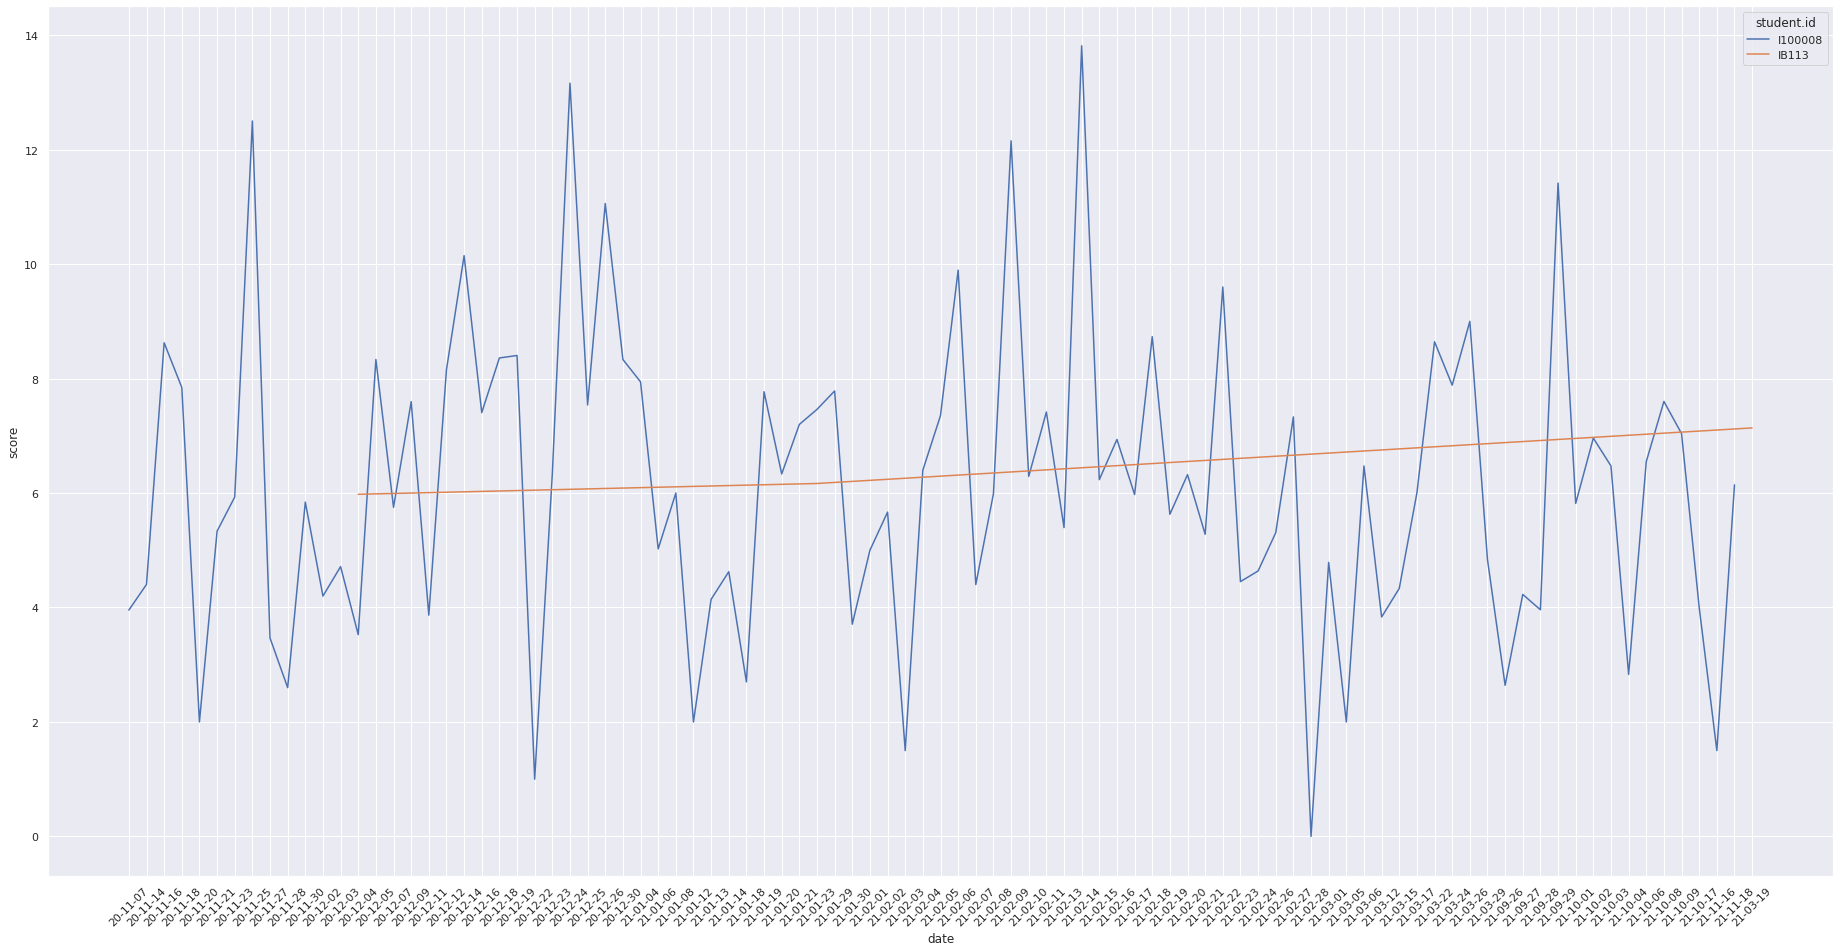

In [ ]:
import matplotlib.pyplot as plt

#plt.ylim(0.0, 1.0)
plt.xticks(rotation=45)
sns.lineplot(x="date", y="score", 
           data=student_scoring_rate_per_year_level_score[(student_scoring_rate_per_year_level_score['student.id'] == 'I100008') | (student_scoring_rate_per_year_level_score['student.id'] == 'IB113')],
           hue = 'student.id')


# 누적 일자별 score

In [136]:
academy_student_workwheet_scoring_problem_problem_cpt = pd.read_csv('/content/drive/MyDrive/teamC/Hanbin/data/academy_student_workwheet_scoring_problem_problem_cpt.csv')
academy_student_workwheet_scoring_problem_problem_cpt

,Unnamed: 0,academy.id,academy.status,academy.create_datetime,academy.runway,student.id,student.school_type,student.grade,student.status,s_ws.id,...,p_cpt.id,p_cpt.problem_curriculum_id,p_cpt.school,p_cpt.grade,p_cpt.semester,p_cpt.name,p_cpt.sequence,p_cpt.correct_rate,p_cpt.create_datetime,p_cpt.update_datetime
0,0,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
1,1,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6915136,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
2,2,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6931764,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
3,3,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6931761,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
4,4,D0409,PAY_INPROGRESS,2017-03-02,2086,I15492,3,3,1,6931765,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10066302,10066302,D11960,PAY_INPROGRESS,2021-06-24 10:40:15,510,I342262,3,3,0,14412532,...,3575,3653,3,3,1,미분가능일 조건,3,63.4014,2021-10-26 00:20:39,2021-10-26 00:20:39
10066303,10066303,D11960,PAY_INPROGRESS,2021-06-24 10:40:15,510,I342262,3,3,0,14412532,...,3575,3653,3,3,1,미분가능일 조건,3,63.4014,2021-10-26 00:20:39,2021-10-26 00:20:39
10066304,10066304,D4969,PAY_INPROGRESS,2019-04-01 00:00:00,1326,I438579,3,3,0,14455719,...,2577,3524,3,1,1,공통근을 갖는 이차방정식,7,55.8360,2021-10-26 00:20:39,2021-10-26 00:20:39
10066305,10066305,D8216,PAY_INPROGRESS,2020-04-02 00:00:00,959,I203077,3,3,1,14618044,...,3060,3604,3,2,1,∞/∞ 꼴의 극한; 로그를 포함한 식,3,53.0114,2021-10-26 00:20:39,2021-10-26 00:20:39


In [ ]:
student_scoring_rate_per_year_level = academy_student_workwheet_scoring_problem_problem_cpt.groupby(['student.id', 'year', 'date', 'p.level', 'ws_scoring.result'])['p.id'].count()
student_scoring_rate_per_year_level = pd.DataFrame(student_scoring_rate_per_year_level).pivot_table(index=['student.id','year', 'date', 'p.level'], columns='ws_scoring.result', values='p.id')
student_scoring_rate_per_year_level = student_scoring_rate_per_year_level.fillna(0)
student_scoring_rate_per_year_level['correct_rate'] = student_scoring_rate_per_year_level['CORRECT'] / (student_scoring_rate_per_year_level['CORRECT'] + student_scoring_rate_per_year_level['WRONG'])
student_scoring_rate_per_year_level = student_scoring_rate_per_year_level.reset_index()
student_scoring_rate_per_year_level['score'] = student_scoring_rate_per_year_level['correct_rate'] * student_scoring_rate_per_year_level['p.level']
student_scoring_rate_per_year_level['solve_num'] = student_scoring_rate_per_year_level['CORRECT'] + student_scoring_rate_per_year_level['WRONG']
# student_scoring_rate_per_year_level['cumulative_correct'] = 0
# student_scoring_rate_per_year_level['cumulative_wrong'] = 0





student_scoring_rate_per_year_level

ws_scoring.result,student.id,year,date,p.level,CORRECT,WRONG,correct_rate,score,solve_num
0,I100008,2020,20-11-07,2,8.0,3.0,0.727273,1.454545,11.0
1,I100008,2020,20-11-07,3,1.0,5.0,0.166667,0.500000,6.0
2,I100008,2020,20-11-07,4,1.0,1.0,0.500000,2.000000,2.0
3,I100008,2020,20-11-07,5,0.0,1.0,0.000000,0.000000,1.0
4,I100008,2020,20-11-14,2,6.0,1.0,0.857143,1.714286,7.0
...,...,...,...,...,...,...,...,...,...
994131,IB163,2021,21-03-18,1,11.0,0.0,1.000000,1.000000,11.0
994132,IB163,2021,21-03-18,2,74.0,10.0,0.880952,1.761905,84.0
994133,IB163,2021,21-03-18,3,115.0,20.0,0.851852,2.555556,135.0
994134,IB163,2021,21-03-18,4,30.0,9.0,0.769231,3.076923,39.0


In [ ]:
student_scoring_rate_per_year_level_score = pd.DataFrame(student_scoring_rate_per_year_level.groupby(['student.id','year', 'date'])['score', 'solve_num'].sum())
student_scoring_rate_per_year_level_score = student_scoring_rate_per_year_level_score.reset_index()

from sklearn.preprocessing import MinMaxScaler
scaler_ = MinMaxScaler()
scaler_.fit(pd.DataFrame(student_scoring_rate_per_year_level_score['solve_num']))
student_scoring_rate_per_year_level_score['scaled_solve_num'] = scaler_.transform(pd.DataFrame(student_scoring_rate_per_year_level_score['solve_num']))


scaler_.fit(pd.DataFrame(student_scoring_rate_per_year_level_score['score']))
student_scoring_rate_per_year_level_score['scaled_score'] = scaler_.transform(pd.DataFrame(student_scoring_rate_per_year_level_score['score']))


student_scoring_rate_per_year_level_score['score_rating'] = student_scoring_rate_per_year_level_score['scaled_score']
student_scoring_rate_per_year_level_score['score_rating'] = student_scoring_rate_per_year_level_score['score_rating'].apply(rating)


student_scoring_rate_per_year_level_score['solve_num_rating'] = student_scoring_rate_per_year_level_score['scaled_solve_num']
student_scoring_rate_per_year_level_score['solve_num_rating'] = student_scoring_rate_per_year_level_score['solve_num_rating'].apply(rating)

student_scoring_rate_per_year_level_score

## student_date_dict 저장

In [ ]:
student_date_dict = {}

student_unique_list  = student_scoring_rate_per_year_level['student.id'].unique()
for i in tqdm(range(len(student_unique_list))):
  student_date_dict[str(student_unique_list[i])] = student_scoring_rate_per_year_level[student_scoring_rate_per_year_level['student.id']== student_unique_list[i]]['date'].unique()
student_date_dict

In [ ]:
import pickle

with open('/content/drive/MyDrive/teamC/Hanbin/data/student_date_dict.pickle','wb') as fw:
    pickle.dump(student_date_dict, fw)

# load data
with open('/content/drive/MyDrive/teamC/Hanbin/data/student_date_dict.pickle', 'rb') as fr:
    student_date_dict = pickle.load(fr)

In [ ]:
'''
def cumulative_sum(x):
  cumulative_correct = 0 
  cumulative_wrong = 0
  for student in student_date_dict.keys:
    for date in student_date_dict[student]:
      cumulative_correct += student_scoring_rate_per_year_level[student_scoring_rate_per_year_level['date'] == date]['CORRECT']
      cumulative_wrong += student_scoring_rate_per_year_level[student_scoring_rate_per_year_level['date'] == date]['WRONG']
'''    
# 속도 향상을 위한 재귀 함수
def cumulative_sum_correct(student_id, date):
    cumulative_correct = 0 
    if date == student_date_dict[student_id][0]:
       cumulative_correct += student_scoring_rate_per_year_level[student_scoring_rate_per_year_level['date'] == date]['CORRECT']
       return cumulative_correct

    else:
      date_index = student_date_dict[student_id].index(student_date_dict[student_id][date])
      date = student_date_dict[student_id][date_index-1]
      cumulative_sum_correct(student_id, date)

def cumulative_sum_wrong(student_id, date):
    cumulative_wrong = 0 
    if date == student_date_dict[student_id][0]:
       cumulative_wrong += student_scoring_rate_per_year_level[student_scoring_rate_per_year_level['date'] == date]['WRONG']
       return cumulative_wrong

    else:
      date_index = student_date_dict[student_id].index(student_date_dict[student_id][date])
      date = student_date_dict[student_id][date_index-1]
      cumulative_sum_wrong(student_id, date)

In [ ]:
dummy = student_scoring_rate_per_year_level[:3000]
dummy

ws_scoring.result,student.id,year,date,p.level,CORRECT,WRONG,correct_rate,score,solve_num
0,I100008,2020,20-11-07,2,8.0,3.0,0.727273,1.454545,11.0
1,I100008,2020,20-11-07,3,1.0,5.0,0.166667,0.500000,6.0
2,I100008,2020,20-11-07,4,1.0,1.0,0.500000,2.000000,2.0
3,I100008,2020,20-11-07,5,0.0,1.0,0.000000,0.000000,1.0
4,I100008,2020,20-11-14,2,6.0,1.0,0.857143,1.714286,7.0
...,...,...,...,...,...,...,...,...,...
2995,I102609,2021,21-02-06,3,8.0,0.0,1.000000,3.000000,8.0
2996,I102609,2021,21-02-06,4,9.0,0.0,1.000000,4.000000,9.0
2997,I102609,2021,21-02-06,5,1.0,0.0,1.000000,5.000000,1.0
2998,I102609,2021,21-02-07,1,1.0,0.0,1.000000,1.000000,1.0


In [ ]:
dummy_student_date_dict = {}

student_unique_list  = dummy['student.id'].unique()
for i in tqdm(range(len(student_unique_list))):
  dummy_student_date_dict[str(student_unique_list[i])] = dummy[dummy['student.id']== student_unique_list[i]]['date'].unique()
dummy_student_date_dict

In [ ]:
dummy_student_date_dict.keys()

dict_keys(['I100008', 'I100067', 'I100168', 'I100268', 'I100300', 'I100355', 'I100360', 'I100361', 'I100365', 'I100496', 'I100596', 'I100650', 'I100651', 'I100652', 'I100758', 'I100762', 'I100827', 'I100837', 'I101283', 'I101409', 'I101428', 'I101658', 'I101743', 'I101744', 'I101786', 'I101791', 'I101869', 'I101947', 'I101967', 'I101988', 'I102099', 'I102119', 'I102222', 'I102363', 'I102464', 'I102520', 'I102522', 'I102550', 'I102609'])

In [ ]:
level_list = [1, 2, 3, 4, 5]

for student in tqdm(dummy_student_date_dict.keys()):
  student_df = student_scoring_rate_per_year_level[student_scoring_rate_per_year_level['student.id'] == student]
 
  for level in tqdm(level_list):
    try: 
      level_df = student_df[student_df['p.level'] == level]
    except:
      pass

level_df

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

ws_scoring.result,student.id,year,date,p.level,CORRECT,WRONG,correct_rate,score,solve_num
2938,I102609,2020,20-10-30,5,5.0,0.0,1.000000,5.000000,5.0
2942,I102609,2020,20-11-02,5,1.0,2.0,0.333333,1.666667,3.0
2945,I102609,2020,20-11-06,5,1.0,5.0,0.166667,0.833333,6.0
2949,I102609,2020,20-11-20,5,6.0,2.0,0.750000,3.750000,8.0
2952,I102609,2020,20-11-23,5,4.0,2.0,0.666667,3.333333,6.0
2955,I102609,2021,21-01-02,5,5.0,1.0,0.833333,4.166667,6.0
2959,I102609,2021,21-01-03,5,3.0,0.0,1.000000,5.000000,3.0
2964,I102609,2021,21-01-09,5,3.0,0.0,1.000000,5.000000,3.0
2968,I102609,2021,21-01-10,5,2.0,0.0,1.000000,5.000000,2.0
2973,I102609,2021,21-01-16,5,1.0,1.0,0.500000,2.500000,2.0


In [ ]:
date_df = level_df[level_df['date'] == '20-10-30']
date_df['CORRECT'].values[0]

5.0

In [ ]:
dummy_student_date_dict['I102609']

array(['20-10-30', '20-11-02', '20-11-06', '20-11-20', '20-11-23',
       '21-01-02', '21-01-03', '21-01-09', '21-01-10', '21-01-16',
       '21-01-17', '21-01-23', '21-01-24', '21-01-30', '21-01-31',
       '21-02-06', '21-02-07'], dtype=object)

In [ ]:
cumulative_correct = 0
for date in dummy_student_date_dict['I102609']:
  correct = level_df[level_df['date'] == date]['CORRECT'].values[0]
  cumulative_correct += correct
  print(cumulative_correct)

In [ ]:
dummy

ws_scoring.result,student.id,year,date,p.level,CORRECT,WRONG,correct_rate,score,solve_num,cumulative_correct
0,I100008,2020,20-11-07,2,8.0,3.0,0.727273,1.454545,11.0,0
1,I100008,2020,20-11-07,3,1.0,5.0,0.166667,0.500000,6.0,0
2,I100008,2020,20-11-07,4,1.0,1.0,0.500000,2.000000,2.0,0
3,I100008,2020,20-11-07,5,0.0,1.0,0.000000,0.000000,1.0,0
4,I100008,2020,20-11-14,2,6.0,1.0,0.857143,1.714286,7.0,0
...,...,...,...,...,...,...,...,...,...,...
2995,I102609,2021,21-02-06,3,8.0,0.0,1.000000,3.000000,8.0,0
2996,I102609,2021,21-02-06,4,9.0,0.0,1.000000,4.000000,9.0,0
2997,I102609,2021,21-02-06,5,1.0,0.0,1.000000,5.000000,1.0,0
2998,I102609,2021,21-02-07,1,1.0,0.0,1.000000,1.000000,1.0,0


In [ ]:
len(dummy.index)

3000

In [ ]:
dummy_pivot.index[0]

('I100008', 2020, '20-11-07', 2)

In [ ]:
dummy_pivot.iloc[0]['CORRECT']

8.0

In [ ]:
student = dummy_pivot.index[0][0]

dummy_pivot['cumulative_correct'] = 0
cumulative_correct = 0
for i in range(len(dummy_pivot)):
  if student == dummy_pivot.index[i][0]:
    student = dummy_pivot.index[i][0]
    year = dummy_pivot.index[i][1]
    date = dummy_pivot.index[i][2]
    level = dummy_pivot.index[i][3]
    correct = dummy_pivot.iloc[i]['CORRECT']
    cumulative_correct += correct
    dummy_pivot['cumulative_correct'][i] = cumulative_correct

  elif student != dummy_pivot.index[i][0]:
    student = dummy_pivot.index[i][0]
    year = dummy_pivot.index[i][1]
    date = dummy_pivot.index[i][2]
    level = dummy_pivot.index[i][3]
    correct = dummy_pivot.iloc[i]['CORRECT']
    cumulative_correct += correct
    dummy_pivot['cumulative_correct'][i] = cumulative_correct


dummy_pivot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ws_scoring.result                 CORRECT  WRONG  cumulative_correct
student.id year date     p.level                                    
I100008    2020 20-11-07 2            8.0    3.0                   8
                         3            1.0    5.0                   9
                         4            1.0    1.0                  10
                         5            0.0    1.0                  10
                20-11-14 2            6.0    1.0                  16
...                                   ...    ...                 ...
I102609    2021 21-02-06 3            8.0    0.0               25143
                         4            9.0    0.0               25152
                         5            1.0    0.0               25153
                21-02-07 1            1.0    0.0               25154
                         2            4.0    0.0               25158

[3000 rows x 3 columns]

In [ ]:
student = dummy.iloc[0]['student.id']
level = dummy.iloc[0]['p.level']
date = dummy.iloc[0]['date']
correct = dummy.iloc[0]['CORRECT']


dummy['cumulative_correct'] = 0
cumulative_correct = 0
for i in range(len(dummy)):
  if student == dummy.iloc[i]['student.id']:
    student = dummy.iloc[i]['student.id']
    level = dummy.iloc[i]['p.level']
    date = dummy.iloc[i]['date']
    correct = dummy.iloc[i]['CORRECT']
    cumulative_correct += correct
    dummy['cumulative_correct'][i] = cumulative_correct

  elif student != dummy.iloc[i]['student.id']:
    cumulative_correct = 0
    student = dummy.iloc[i]['student.id']
    level = dummy.iloc[i]['p.level']
    date = dummy.iloc[i]['date']
    correct = dummy.iloc[i]['CORRECT']
    cumulative_correct += correct
    dummy['cumulative_correct'][i] = cumulative_correct


dummy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


ws_scoring.result,student.id,year,date,p.level,CORRECT,WRONG,correct_rate,score,solve_num,cumulative_correct
0,I100008,2020,20-11-07,2,8.0,3.0,0.727273,1.454545,11.0,8
1,I100008,2020,20-11-07,3,1.0,5.0,0.166667,0.500000,6.0,9
2,I100008,2020,20-11-07,4,1.0,1.0,0.500000,2.000000,2.0,10
3,I100008,2020,20-11-07,5,0.0,1.0,0.000000,0.000000,1.0,10
4,I100008,2020,20-11-14,2,6.0,1.0,0.857143,1.714286,7.0,16
...,...,...,...,...,...,...,...,...,...,...
2995,I102609,2021,21-02-06,3,8.0,0.0,1.000000,3.000000,8.0,291
2996,I102609,2021,21-02-06,4,9.0,0.0,1.000000,4.000000,9.0,300
2997,I102609,2021,21-02-06,5,1.0,0.0,1.000000,5.000000,1.0,301
2998,I102609,2021,21-02-07,1,1.0,0.0,1.000000,1.000000,1.0,302


In [ ]:
dummy_pivot = pd.DataFrame(dummy.groupby(['student.id','year', 'date','p.level'])['CORRECT', 'WRONG'].sum())
dummy_pivot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


ws_scoring.result                 CORRECT  WRONG
student.id year date     p.level                
I100008    2020 20-11-07 2            8.0    3.0
                         3            1.0    5.0
                         4            1.0    1.0
                         5            0.0    1.0
                20-11-14 2            6.0    1.0
...                                   ...    ...
I102609    2021 21-02-06 3            8.0    0.0
                         4            9.0    0.0
                         5            1.0    0.0
                21-02-07 1            1.0    0.0
                         2            4.0    0.0

[3000 rows x 2 columns]

In [ ]:
dummy_pivot.index[0]

('I100008', 2020, '20-11-07', 2)

In [ ]:
level_list = [1, 2, 3, 4, 5]
dummy['cumulative_correct'] = 0
for student in tqdm(dummy_student_date_dict.keys()):
  student_df = dummy[dummy['student.id'] == student]
 
  for level in tqdm(level_list):
    try: 
      level_df = student_df[student_df['p.level'] == level]
          
      cumulative_correct = 0
      for date in dummy_student_date_dict[student]:
        cumulative_correct += level_df[level_df['date'] == date]['CORRECT'].values[0]
        level_df[level_df['date'] == date]['cumulative_correct'] = cumulative_correct
#        dummy[(dummy['student.id'] == student) & (dummy['p.level'] == level) & (dummy['date'] == date)]['cumulative_correct'] = cumulative_correct



    except:
      pass
level_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

ws_scoring.result,student.id,year,date,p.level,CORRECT,WRONG,correct_rate,score,solve_num,cumulative_correct
2938,I102609,2020,20-10-30,5,5.0,0.0,1.000000,5.000000,5.0,0
2942,I102609,2020,20-11-02,5,1.0,2.0,0.333333,1.666667,3.0,0
2945,I102609,2020,20-11-06,5,1.0,5.0,0.166667,0.833333,6.0,0
2949,I102609,2020,20-11-20,5,6.0,2.0,0.750000,3.750000,8.0,0
2952,I102609,2020,20-11-23,5,4.0,2.0,0.666667,3.333333,6.0,0
2955,I102609,2021,21-01-02,5,5.0,1.0,0.833333,4.166667,6.0,0
2959,I102609,2021,21-01-03,5,3.0,0.0,1.000000,5.000000,3.0,0
2964,I102609,2021,21-01-09,5,3.0,0.0,1.000000,5.000000,3.0,0
2968,I102609,2021,21-01-10,5,2.0,0.0,1.000000,5.000000,2.0,0
2973,I102609,2021,21-01-16,5,1.0,1.0,0.500000,2.500000,2.0,0


In [ ]:
dummy[dummy['ws_scoring.result'] == index__]['CORRECT']

KeyError: ignored

# 연습

In [ ]:
df = pd.DataFrame(np.array([['a', 1, 4], ['a', 2, 5], ['b', 3, 6]]),
                   columns=['col1', 'col2', 'col3'])

In [ ]:
def multiple_inouts(row):
    if row['col1'] == 'a':  # 'a'일 때, col2 10으로 나눈 후 부호반대
        col2 =  -float(row['col2'])/10
        col3 = row['col3']
    else:
        col2 = row['col2']  # 'b'일 때, col3 값 X 100 
        col3 = int(row['col3'])*100
        
    return [col2, col3]

In [ ]:
def cumulative_sum_correct(row):
  if row['student.id'] == student_date_dict.keys[0]:
    cumulative_correct = 0 
    if row['date'] == student_date_dict[ student_date_dict.keys[0] ][0]:
      cumulative_correct += row['CORRECT']
      return cumulative_correct
    else: 
      date_index = student_date_dict[ student_date_dict.keys[0] ].index(student_date_dict[ student_date_dict.keys[0] ][row['date']])
      row['date'] = student_date_dict[ student_date_dict.keys[0] ][date_index-1]


In [ ]:
student_date_dict

{'I100008': array(['20-11-07', '20-11-14', '20-11-16', '20-11-18', '20-11-20',
        '20-11-21', '20-11-23', '20-11-25', '20-11-27', '20-11-28',
        '20-11-30', '20-12-02', '20-12-03', '20-12-04', '20-12-05',
        '20-12-07', '20-12-09', '20-12-11', '20-12-12', '20-12-14',
        '20-12-16', '20-12-18', '20-12-19', '20-12-22', '20-12-23',
        '20-12-24', '20-12-25', '20-12-26', '20-12-30', '21-01-04',
        '21-01-06', '21-01-08', '21-01-12', '21-01-13', '21-01-14',
        '21-01-18', '21-01-19', '21-01-20', '21-01-21', '21-01-23',
        '21-01-29', '21-01-30', '21-02-01', '21-02-02', '21-02-03',
        '21-02-04', '21-02-05', '21-02-06', '21-02-07', '21-02-08',
        '21-02-09', '21-02-10', '21-02-11', '21-02-13', '21-02-14',
        '21-02-15', '21-02-16', '21-02-17', '21-02-18', '21-02-19',
        '21-02-20', '21-02-21', '21-02-22', '21-02-23', '21-02-24',
        '21-02-26', '21-02-27', '21-02-28', '21-03-01', '21-03-05',
        '21-03-06', '21-03-12', '21-0

In [ ]:
list(student_date_dict['I100008']).index('20-11-07')

0

In [ ]:
# 속도 향상을 위한 재귀 함수
def cumulative_sum_correct(row):
    cumulative_correct = 0 
    if row['date'] == student_date_dict[row['student.id']][0]:
       cumulative_correct += row['CORRECT']
       return cumulative_correct

    else:
      date_index = list(student_date_dict[row['student.id']]).index(row['date'])
      row['date'] = student_date_dict[row['student.id']][date_index-1]
      cumulative_sum_correct(row)

In [ ]:
dummy['cumulative_correct'] = dummy.apply(lambda x: cumulative_sum_correct(x), axis=1, result_type='expand')
dummy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


ws_scoring.result,student.id,year,date,p.level,CORRECT,WRONG,correct_rate,score,solve_num,cumulative_correct
0,I100008,2020,20-11-07,2,8.0,3.0,0.727273,1.454545,11.0,8.0
1,I100008,2020,20-11-07,3,1.0,5.0,0.166667,0.500000,6.0,1.0
2,I100008,2020,20-11-07,4,1.0,1.0,0.500000,2.000000,2.0,1.0
3,I100008,2020,20-11-07,5,0.0,1.0,0.000000,0.000000,1.0,0.0
4,I100008,2020,20-11-14,2,6.0,1.0,0.857143,1.714286,7.0,NaN
5,I100008,2020,20-11-14,3,6.0,4.0,0.600000,1.800000,10.0,NaN
6,I100008,2020,20-11-14,4,2.0,7.0,0.222222,0.888889,9.0,NaN
7,I100008,2020,20-11-14,5,0.0,1.0,0.000000,0.000000,1.0,NaN
8,I100008,2020,20-11-16,2,3.0,0.0,1.000000,2.000000,3.0,NaN
9,I100008,2020,20-11-16,3,7.0,1.0,0.875000,2.625000,8.0,NaN


In [181]:
student_scoring_rate_per_year_level = academy_student_workwheet_scoring_problem_problem_cpt.groupby(['student.id', 'year', 'date', 'p.level', 'ws_scoring.result'])['p.id'].count()
student_scoring_rate_per_year_level = pd.DataFrame(student_scoring_rate_per_year_level).pivot_table(index=['student.id','year', 'date'], columns=['ws_scoring.result','p.level'], values='p.id')
student_scoring_rate_per_year_level = student_scoring_rate_per_year_level.fillna(0)
student_scoring_rate_per_year_level

ws_scoring.result        CORRECT                         WRONG              \
p.level                        1     2      3     4    5     1     2     3   
student.id year date                                                         
I100008    2020 20-11-07     0.0   8.0    1.0   1.0  0.0   0.0   3.0   5.0   
                20-11-14     0.0   6.0    6.0   2.0  0.0   0.0   1.0   4.0   
                20-11-16     0.0   3.0    7.0   1.0  0.0   0.0   0.0   1.0   
                20-11-18     0.0   2.0    6.0   9.0  0.0   0.0   0.0   1.0   
                20-11-20     0.0   1.0    0.0   0.0  0.0   0.0   0.0   1.0   
...                          ...   ...    ...   ...  ...   ...   ...   ...   
IB113      2021 21-01-23     1.0   3.0    8.0   1.0  0.0   0.0   1.0   1.0   
                21-03-19     1.0   5.0    9.0   4.0  0.0   0.0   3.0   7.0   
IB123      2021 21-02-18     8.0  40.0   43.0   6.0  1.0   0.0  12.0  23.0   
                21-03-30     2.0  23.0   44.0  16.0  0.0   1.0  10.0  28.0   
IB163      2021 21-03-18    11.0  74.0  115.0  30.0  2.0   0.0  10.0  20.0   

ws_scoring.result                    
p.level                      4    5  
student.id year date                 
I100008    2020 20-11-07   1.0  1.0  
                20-11-14   7.0  1.0  
                20-11-16   0.0  0.0  
                20-11-18   2.0  0.0  
                20-11-20   0.0  0.0  
...                        ...  ...  
IB113      2021 21-01-23   3.0  0.0  
                21-03-19   1.0  0.0  
IB123      2021 21-02-18   5.0  2.0  
                21-03-30  19.0  0.0  
IB163      2021 21-03-18   9.0  1.0  

[289695 rows x 10 columns]

In [138]:
student_scoring_rate_per_year_level.index

MultiIndex([('I100008', 2020, '20-11-07'),
            ('I100008', 2020, '20-11-14'),
            ('I100008', 2020, '20-11-16'),
            ('I100008', 2020, '20-11-18'),
            ('I100008', 2020, '20-11-20'),
            ('I100008', 2020, '20-11-21'),
            ('I100008', 2020, '20-11-23'),
            ('I100008', 2020, '20-11-25'),
            ('I100008', 2020, '20-11-27'),
            ('I100008', 2020, '20-11-28'),
            ...
            ( 'I99963', 2021, '21-01-15'),
            ( 'I99963', 2021, '21-02-05'),
            ( 'I99963', 2021, '21-02-20'),
            ( 'I99963', 2021, '21-02-26'),
            (  'IB113', 2020, '20-12-04'),
            (  'IB113', 2021, '21-01-23'),
            (  'IB113', 2021, '21-03-19'),
            (  'IB123', 2021, '21-02-18'),
            (  'IB123', 2021, '21-03-30'),
            (  'IB163', 2021, '21-03-18')],
           names=['student.id', 'year', 'date'], length=289695)

In [ ]:
def cumsum(row):
  cumulative_correct = 0 
  index__ = student_scoring_rate_per_year_level.index(row)
  while TRUE:
    if index__ == 0:
      val = student_scoring_rate_per_year_level.iloc[index__-1].values[0]
      cumulative_correct += val
    break

    else: 
      val = student_scoring_rate_per_year_level.iloc[index__-1].values[0]
      cumulative_correct += val
      cumsum(row)    

In [182]:
dummy_pivot = student_scoring_rate_per_year_level[:300]
dummy_pivot

ws_scoring.result        CORRECT                       WRONG                   \
p.level                        1     2     3    4    5     1     2     3    4   
student.id year date                                                            
I100008    2020 20-11-07     0.0   8.0   1.0  1.0  0.0   0.0   3.0   5.0  1.0   
                20-11-14     0.0   6.0   6.0  2.0  0.0   0.0   1.0   4.0  7.0   
                20-11-16     0.0   3.0   7.0  1.0  0.0   0.0   0.0   1.0  0.0   
                20-11-18     0.0   2.0   6.0  9.0  0.0   0.0   0.0   1.0  2.0   
                20-11-20     0.0   1.0   0.0  0.0  0.0   0.0   0.0   1.0  0.0   
...                          ...   ...   ...  ...  ...   ...   ...   ...  ...   
I100168    2021 21-04-09     0.0  18.0   9.0  1.0  0.0   0.0  11.0  10.0  4.0   
                21-04-14    23.0  45.0  23.0  4.0  0.0   2.0   8.0  15.0  5.0   
                21-04-16    21.0  27.0  12.0  2.0  0.0   3.0   8.0  17.0  3.0   
                21-04-21    19.0  31.0  22.0  3.0  0.0   1.0   6.0   9.0  9.0   
                21-04-23     6.0   3.0   3.0  0.0  0.0   0.0   4.0   3.0  1.0   

ws_scoring.result              
p.level                     5  
student.id year date           
I100008    2020 20-11-07  1.0  
                20-11-14  1.0  
                20-11-16  0.0  
                20-11-18  0.0  
                20-11-20  0.0  
...                       ...  
I100168    2021 21-04-09  0.0  
                21-04-14  1.0  
                21-04-16  0.0  
                21-04-21  0.0  
                21-04-23  0.0  

[300 rows x 10 columns]

In [ ]:
dummy_pivot.iloc[0]['CORRECT']

p.level
1    0.0
2    8.0
3    1.0
4    1.0
5    0.0
Name: (I100008, 2020, 20-11-07), dtype: float64

In [ ]:
dummy_pivot.iloc[0]['CORRECT'][2]

8.0

In [ ]:
for i in range(1,6):
  print(i)

1
2
3
4
5


In [ ]:
for num in range(1,6):
  correct = dummy_pivot.iloc[i]['CORRECT'][num]
  cumulative_correct += correct
  dummy_pivot['cumulative_correct_1'][i] = cumulative_correct_1


In [141]:
correct = dummy_pivot.iloc[0]['CORRECT'][1]
correct.dtype

dtype('float64')

In [183]:
student = dummy_pivot.index[0][0]

dummy_pivot['cumulative_correct'] = 0
cumulative_correct = 0
for i in range(len(dummy_pivot)):
  if student == dummy_pivot.index[i][0]:
    student = dummy_pivot.index[i][0]
    year = dummy_pivot.index[i][1]
    date = dummy_pivot.index[i][2]
    level = dummy_pivot.index[i][3]
    
    correct = dummy_pivot.iloc[i]['CORRECT']
    cumulative_correct += correct
    dummy_pivot['cumulative_correct'][i] = cumulative_correct

  elif student != dummy_pivot.index[i][0]:
    student = dummy_pivot.index[i][0]
    year = dummy_pivot.index[i][1]
    date = dummy_pivot.index[i][2]
    level = dummy_pivot.index[i][3]
    correct = dummy_pivot.iloc[i]['CORRECT']
    cumulative_correct += correct
    dummy_pivot['cumulative_correct'][i] = cumulative_correct


dummy_pivot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


IndexError: ignored

In [153]:
dummy_pivot['cumulative_correct_1']

student.id  year  date    
I100008     2020  20-11-07    0
                  20-11-14    0
                  20-11-16    0
                  20-11-18    0
                  20-11-20    0
                             ..
I100168     2021  21-04-09    0
                  21-04-14    0
                  21-04-16    0
                  21-04-21    0
                  21-04-23    0
Name: cumulative_correct_1, Length: 300, dtype: int64

In [157]:
dummy_pivot['cumulative_correct_1'][0] = 1
dummy_pivot['cumulative_correct_1'].dtype

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


dtype('int64')

In [161]:
cumulative_correct_1_df = pd.DataFrame(cumulative_correct_1_list)

# 시작

In [16]:
student_scoring_rate_per_year_level = academy_student_workwheet_scoring_problem_problem_cpt.groupby(['student.id', 'year', 'date', 'p.level', 'ws_scoring.result'])['p.id'].count()
student_scoring_rate_per_year_level = pd.DataFrame(student_scoring_rate_per_year_level).pivot_table(index=['student.id','year', 'date'], columns=['ws_scoring.result','p.level'], values='p.id')
student_scoring_rate_per_year_level = student_scoring_rate_per_year_level.fillna(0)
student_scoring_rate_per_year_level

ws_scoring.result        CORRECT                         WRONG              \
p.level                        1     2      3     4    5     1     2     3   
student.id year date                                                         
I100008    2020 20-11-07     0.0   8.0    1.0   1.0  0.0   0.0   3.0   5.0   
                20-11-14     0.0   6.0    6.0   2.0  0.0   0.0   1.0   4.0   
                20-11-16     0.0   3.0    7.0   1.0  0.0   0.0   0.0   1.0   
                20-11-18     0.0   2.0    6.0   9.0  0.0   0.0   0.0   1.0   
                20-11-20     0.0   1.0    0.0   0.0  0.0   0.0   0.0   1.0   
...                          ...   ...    ...   ...  ...   ...   ...   ...   
IB113      2021 21-01-23     1.0   3.0    8.0   1.0  0.0   0.0   1.0   1.0   
                21-03-19     1.0   5.0    9.0   4.0  0.0   0.0   3.0   7.0   
IB123      2021 21-02-18     8.0  40.0   43.0   6.0  1.0   0.0  12.0  23.0   
                21-03-30     2.0  23.0   44.0  16.0  0.0   1.0  10.0  28.0   
IB163      2021 21-03-18    11.0  74.0  115.0  30.0  2.0   0.0  10.0  20.0   

ws_scoring.result                    
p.level                      4    5  
student.id year date                 
I100008    2020 20-11-07   1.0  1.0  
                20-11-14   7.0  1.0  
                20-11-16   0.0  0.0  
                20-11-18   2.0  0.0  
                20-11-20   0.0  0.0  
...                        ...  ...  
IB113      2021 21-01-23   3.0  0.0  
                21-03-19   1.0  0.0  
IB123      2021 21-02-18   5.0  2.0  
                21-03-30  19.0  0.0  
IB163      2021 21-03-18   9.0  1.0  

[289695 rows x 10 columns]

In [20]:
student = student_scoring_rate_per_year_level.index[0][0]
student_scoring_rate_per_year_level.index[0][1]

2020

## 누적 correct 

In [200]:
student = student_scoring_rate_per_year_level.index[0][0]
year = student_scoring_rate_per_year_level.index[0][1]

cumulative_correct_1 = 0
cumulative_correct_2 = 0
cumulative_correct_3 = 0
cumulative_correct_4 = 0
cumulative_correct_5 = 0

cumulative_correct_1_list = []
cumulative_correct_2_list = []
cumulative_correct_3_list = []
cumulative_correct_4_list = []
cumulative_correct_5_list = []

for i in tqdm(range(len(student_scoring_rate_per_year_level))):
  if student == student_scoring_rate_per_year_level.index[i][0]:
    student = student_scoring_rate_per_year_level.index[i][0]

    correct_1 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][1]
    cumulative_correct_1 += correct_1
    cumulative_correct_1_list.append(cumulative_correct_1)

    correct_2 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][2]
    cumulative_correct_2 += correct_2
    cumulative_correct_2_list.append(cumulative_correct_2)

    correct_3 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][3]
    cumulative_correct_3 += correct_3
    cumulative_correct_3_list.append(cumulative_correct_3)

    correct_4 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][4]
    cumulative_correct_4 += correct_4
    cumulative_correct_4_list.append(cumulative_correct_4)

    correct_5 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][5]
    cumulative_correct_5 += correct_5
    cumulative_correct_5_list.append(cumulative_correct_5)



  elif student != student_scoring_rate_per_year_level.index[i][0]:
    cumulative_correct_1 = 0
    cumulative_correct_2 = 0
    cumulative_correct_3 = 0
    cumulative_correct_4 = 0
    cumulative_correct_5 = 0

    student = student_scoring_rate_per_year_level.index[i][0]

    correct_1 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][1]
    cumulative_correct_1 += correct_1
    cumulative_correct_1_list.append(cumulative_correct_1)

    correct_2 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][2]
    cumulative_correct_2 += correct_2
    cumulative_correct_2_list.append(cumulative_correct_2)

    correct_3 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][3]
    cumulative_correct_3 += correct_3
    cumulative_correct_3_list.append(cumulative_correct_3)

    correct_4 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][4]
    cumulative_correct_4 += correct_4
    cumulative_correct_4_list.append(cumulative_correct_4)

    correct_5 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][5]
    cumulative_correct_5 += correct_5
    cumulative_correct_5_list.append(cumulative_correct_5)

  0%|          | 0/289695 [00:00<?, ?it/s]

## 누적 wrong

In [201]:
student = student_scoring_rate_per_year_level.index[0][0]

cumulative_wrong_1 = 0
cumulative_wrong_2 = 0
cumulative_wrong_3 = 0
cumulative_wrong_4 = 0
cumulative_wrong_5 = 0


cumulative_wrong_1_list = []
cumulative_wrong_2_list = []
cumulative_wrong_3_list = []
cumulative_wrong_4_list = []
cumulative_wrong_5_list = []

for i in tqdm(range(len(student_scoring_rate_per_year_level))):
  if student == student_scoring_rate_per_year_level.index[i][0]:
    student = student_scoring_rate_per_year_level.index[i][0]

    wrong_1 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][1]
    cumulative_wrong_1 += wrong_1
    cumulative_wrong_1_list.append(cumulative_wrong_1)

    wrong_2 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][2]
    cumulative_wrong_2 += wrong_2
    cumulative_wrong_2_list.append(cumulative_wrong_2)

    wrong_3 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][3]
    cumulative_wrong_3 += wrong_3
    cumulative_wrong_3_list.append(cumulative_wrong_3)

    wrong_4 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][4]
    cumulative_wrong_4 += wrong_4
    cumulative_wrong_4_list.append(cumulative_wrong_4)

    wrong_5 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][5]
    cumulative_wrong_5 += wrong_5
    cumulative_wrong_5_list.append(cumulative_wrong_5)



  elif student != student_scoring_rate_per_year_level.index[i][0]:
    cumulative_wrong_1 = 0
    cumulative_wrong_2 = 0
    cumulative_wrong_3 = 0
    cumulative_wrong_4 = 0
    cumulative_wrong_5 = 0

    student = student_scoring_rate_per_year_level.index[i][0]
    
    wrong_1 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][1]
    cumulative_wrong_1 += wrong_1
    cumulative_wrong_1_list.append(cumulative_wrong_1)

    wrong_2 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][2]
    cumulative_wrong_2 += wrong_2
    cumulative_wrong_2_list.append(cumulative_wrong_2)

    wrong_3 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][3]
    cumulative_wrong_3 += wrong_3
    cumulative_wrong_3_list.append(cumulative_wrong_3)

    wrong_4 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][4]
    cumulative_wrong_4 += wrong_4
    cumulative_wrong_4_list.append(cumulative_wrong_4)

    wrong_5 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][5]
    cumulative_wrong_5 += wrong_5
    cumulative_wrong_5_list.append(cumulative_wrong_5)

  0%|          | 0/289695 [00:00<?, ?it/s]

In [202]:
student_scoring_rate_per_year_level = academy_student_workwheet_scoring_problem_problem_cpt.groupby(['student.id', 'year', 'date'])['p.id'].count()
#student_scoring_rate_per_year_level = pd.DataFrame(student_scoring_rate_per_year_level).pivot_table(index=['student.id','year', 'date'], columns='ws_scoring.result', values='p.id').sum()
student_scoring_rate_per_year_level = student_scoring_rate_per_year_level.fillna(0)
student_scoring_rate_per_year_level = student_scoring_rate_per_year_level.reset_index()
student_scoring_rate_per_year_level = pd.DataFrame(student_scoring_rate_per_year_level)
student_scoring_rate_per_year_level


,student.id,year,date,p.id
0,I100008,2020,20-11-07,20
1,I100008,2020,20-11-14,27
2,I100008,2020,20-11-16,12
3,I100008,2020,20-11-18,20
4,I100008,2020,20-11-20,2
...,...,...,...,...
289690,IB113,2021,21-01-23,18
289691,IB113,2021,21-03-19,30
289692,IB123,2021,21-02-18,140
289693,IB123,2021,21-03-30,143


In [203]:
cumulative_correct_1_df = pd.DataFrame(cumulative_correct_1_list)
cumulative_correct_2_df = pd.DataFrame(cumulative_correct_2_list)
cumulative_correct_3_df = pd.DataFrame(cumulative_correct_3_list)
cumulative_correct_4_df = pd.DataFrame(cumulative_correct_4_list)
cumulative_correct_5_df = pd.DataFrame(cumulative_correct_5_list)


cumulative_wrong_1_df = pd.DataFrame(cumulative_wrong_1_list)
cumulative_wrong_2_df = pd.DataFrame(cumulative_wrong_2_list)
cumulative_wrong_3_df = pd.DataFrame(cumulative_wrong_3_list)
cumulative_wrong_4_df = pd.DataFrame(cumulative_wrong_4_list)
cumulative_wrong_5_df = pd.DataFrame(cumulative_wrong_5_list)



result1 = pd.concat([student_scoring_rate_per_year_level,
                     cumulative_correct_1_df,
                     cumulative_correct_2_df,
                     cumulative_correct_3_df,
                     cumulative_correct_4_df,
                     cumulative_correct_5_df,
                     cumulative_wrong_1_df,
                     cumulative_wrong_2_df,
                     cumulative_wrong_3_df,
                     cumulative_wrong_4_df,
                     cumulative_wrong_5_df],axis=1)
result1.columns = ['student.id',	'year',	'date',	'p.id', 
                   'cumulative_correct_1',
                   'cumulative_correct_2',
                   'cumulative_correct_3',
                   'cumulative_correct_4',
                   'cumulative_correct_5',
                   'cumulative_wrong_1',
                   'cumulative_wrong_2',
                   'cumulative_wrong_3',
                   'cumulative_wrong_4',
                   'cumulative_wrong_5']

result1

,student.id,year,date,p.id,cumulative_correct_1,cumulative_correct_2,cumulative_correct_3,cumulative_correct_4,cumulative_correct_5,cumulative_wrong_1,cumulative_wrong_2,cumulative_wrong_3,cumulative_wrong_4,cumulative_wrong_5
0,I100008,2020,20-11-07,20,0.0,8.0,1.0,1.0,0.0,0.0,3.0,5.0,1.0,1.0
1,I100008,2020,20-11-14,27,0.0,14.0,7.0,3.0,0.0,0.0,4.0,9.0,8.0,2.0
2,I100008,2020,20-11-16,12,0.0,17.0,14.0,4.0,0.0,0.0,4.0,10.0,8.0,2.0
3,I100008,2020,20-11-18,20,0.0,19.0,20.0,13.0,0.0,0.0,4.0,11.0,10.0,2.0
4,I100008,2020,20-11-20,2,0.0,20.0,20.0,13.0,0.0,0.0,4.0,12.0,10.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289690,IB113,2021,21-01-23,18,2.0,10.0,20.0,5.0,0.0,0.0,4.0,9.0,8.0,0.0
289691,IB113,2021,21-03-19,30,3.0,15.0,29.0,9.0,0.0,0.0,7.0,16.0,9.0,0.0
289692,IB123,2021,21-02-18,140,8.0,40.0,43.0,6.0,1.0,0.0,12.0,23.0,5.0,2.0
289693,IB123,2021,21-03-30,143,10.0,63.0,87.0,22.0,1.0,1.0,22.0,51.0,24.0,2.0


In [213]:
for i in tqdm(range(len(result1))):
  if (result1['cumulative_correct_1'][i] + result1['cumulative_wrong_1'][i]) ==0: 
    score_1 = 0 
  else:
    score_1 = (result1['cumulative_correct_1'][i] / (result1['cumulative_correct_1'][i] + result1['cumulative_wrong_1'][i])) * 1


  if (result1['cumulative_correct_2'][i] + result1['cumulative_wrong_2'][i]) ==0: 
    score_2 = 0 
  else:
   score_2 = (result1['cumulative_correct_2'][i] / (result1['cumulative_correct_2'][i] + result1['cumulative_wrong_2'][i])) * 2


  if (result1['cumulative_correct_3'][i] + result1['cumulative_wrong_3'][i]) ==0: 
    score_3 = 0 
  else:
    score_3 = (result1['cumulative_correct_3'][i] / (result1['cumulative_correct_3'][i] + result1['cumulative_wrong_3'][i])) * 3


  if (result1['cumulative_correct_4'][i] + result1['cumulative_wrong_4'][i]) ==0: 
    score_4 = 0 
  else:
   score_4 = (result1['cumulative_correct_4'][i] / (result1['cumulative_correct_4'][i] + result1['cumulative_wrong_4'][i])) * 4


  if (result1['cumulative_correct_5'][i] + result1['cumulative_wrong_5'][i]) ==0: 
    score_5 = 0 
  else:
    score_5 = (result1['cumulative_correct_5'][i] / (result1['cumulative_correct_5'][i] + result1['cumulative_wrong_5'][i])) * 5

  result1['score'][i] = score_1 + score_2 + score_3 + score_4 + score_5

result1

  0%|          | 0/289695 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,student.id,year,date,p.id,cumulative_correct_1,cumulative_correct_2,cumulative_correct_3,cumulative_correct_4,cumulative_correct_5,cumulative_wrong_1,cumulative_wrong_2,cumulative_wrong_3,cumulative_wrong_4,cumulative_wrong_5,score
0,I100008,2020,20-11-07,20,0.0,8.0,1.0,1.0,0.0,0.0,3.0,5.0,1.0,1.0,3.954545
1,I100008,2020,20-11-14,27,0.0,14.0,7.0,3.0,0.0,0.0,4.0,9.0,8.0,2.0,3.958965
2,I100008,2020,20-11-16,12,0.0,17.0,14.0,4.0,0.0,0.0,4.0,10.0,8.0,2.0,4.702381
3,I100008,2020,20-11-18,20,0.0,19.0,20.0,13.0,0.0,0.0,4.0,11.0,10.0,2.0,5.848527
4,I100008,2020,20-11-20,2,0.0,20.0,20.0,13.0,0.0,0.0,4.0,12.0,10.0,2.0,5.802536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289690,IB113,2021,21-01-23,18,2.0,10.0,20.0,5.0,0.0,0.0,4.0,9.0,8.0,0.0,6.035998
289691,IB113,2021,21-03-19,30,3.0,15.0,29.0,9.0,0.0,0.0,7.0,16.0,9.0,0.0,6.296970
289692,IB123,2021,21-02-18,140,8.0,40.0,43.0,6.0,1.0,0.0,12.0,23.0,5.0,2.0,8.341492
289693,IB123,2021,21-03-30,143,10.0,63.0,87.0,22.0,1.0,1.0,22.0,51.0,24.0,2.0,7.862458


In [214]:
result1['score'].isnull().sum()

0

In [215]:
result1.to_csv('/content/drive/MyDrive/teamC/Hanbin/data/result1.csv')

In [231]:
result1['student.id'].unique()[:20]

array(['I100008', 'I100067', 'I100168', 'I100268', 'I100300', 'I100355',
       'I100360', 'I100361', 'I100365', 'I100496', 'I100596', 'I100650',
       'I100651', 'I100652', 'I100758', 'I100762', 'I100827', 'I100837',
       'I101283', 'I101409'], dtype=object)

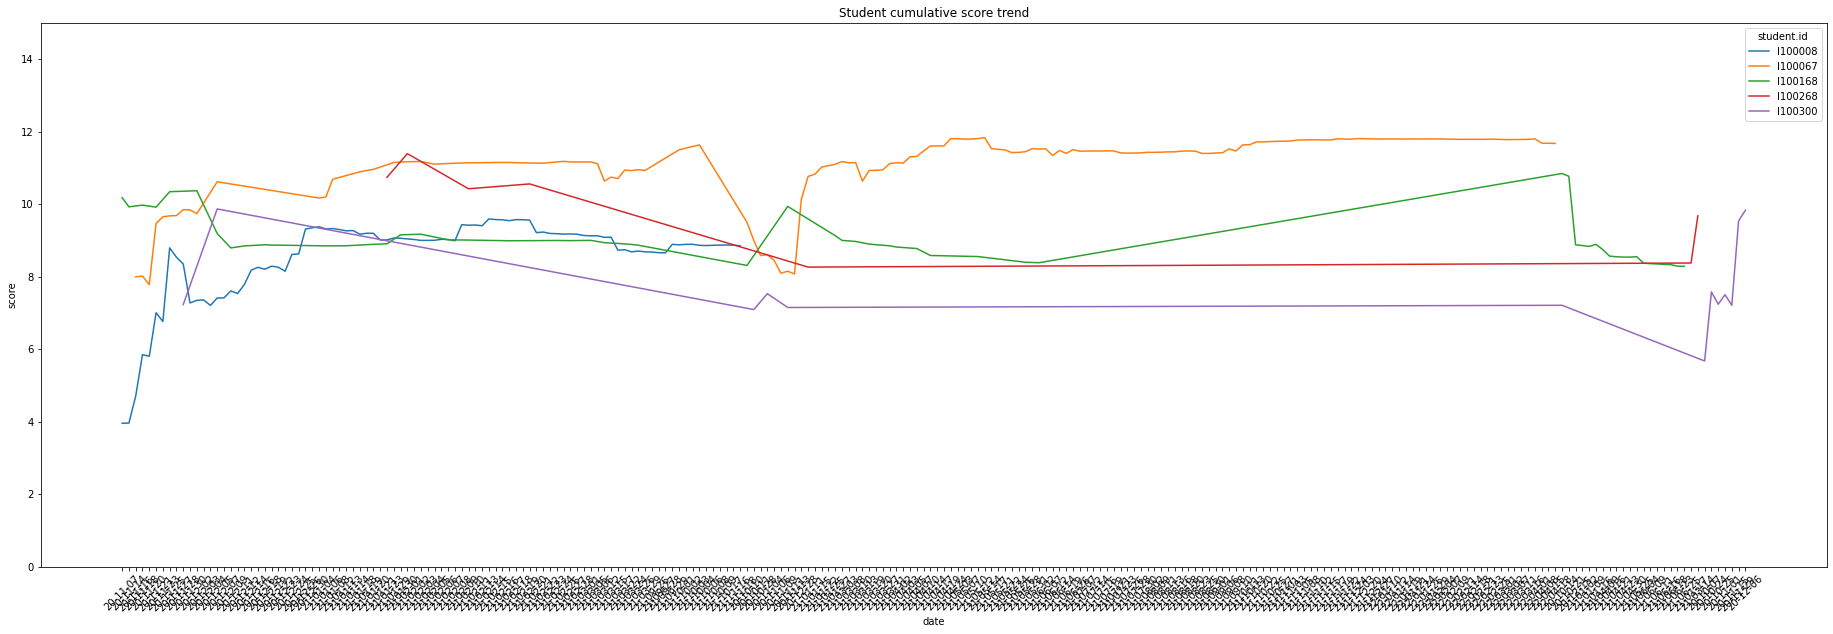

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(32,10))
plt.ylim(0.0, 15.0)
plt.xticks(rotation=45)
sns.lineplot(x="date", y="score", 
           data=result1[(result1['student.id'] == 'I100008') | (result1['student.id'] == 'I100067') | (result1['student.id'] == 'I100168') | (result1['student.id'] == 'I100268') | (result1['student.id'] == 'I100300')],
           hue = 'student.id')

plt.title('Student cumulative score trend')
plt.show()

# 분기별 누적

In [4]:
academy_student_workwheet_scoring_problem_problem_cpt = pd.read_csv('/content/drive/MyDrive/teamC/Hanbin/data/academy_student_workwheet_scoring_problem_problem_cpt.csv')
academy_student_workwheet_scoring_problem_problem_cpt

,Unnamed: 0,academy.id,academy.status,academy.create_datetime,academy.runway,student.id,student.school_type,student.grade,student.status,s_ws.id,...,p_cpt.id,p_cpt.problem_curriculum_id,p_cpt.school,p_cpt.grade,p_cpt.semester,p_cpt.name,p_cpt.sequence,p_cpt.correct_rate,p_cpt.create_datetime,p_cpt.update_datetime
0,0,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
1,1,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6915136,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
2,2,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6931764,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
3,3,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6931761,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
4,4,D0409,PAY_INPROGRESS,2017-03-02,2086,I15492,3,3,1,6931765,...,7471,3316,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10066302,10066302,D11960,PAY_INPROGRESS,2021-06-24 10:40:15,510,I342262,3,3,0,14412532,...,3575,3653,3,3,1,미분가능일 조건,3,63.4014,2021-10-26 00:20:39,2021-10-26 00:20:39
10066303,10066303,D11960,PAY_INPROGRESS,2021-06-24 10:40:15,510,I342262,3,3,0,14412532,...,3575,3653,3,3,1,미분가능일 조건,3,63.4014,2021-10-26 00:20:39,2021-10-26 00:20:39
10066304,10066304,D4969,PAY_INPROGRESS,2019-04-01 00:00:00,1326,I438579,3,3,0,14455719,...,2577,3524,3,1,1,공통근을 갖는 이차방정식,7,55.8360,2021-10-26 00:20:39,2021-10-26 00:20:39
10066305,10066305,D8216,PAY_INPROGRESS,2020-04-02 00:00:00,959,I203077,3,3,1,14618044,...,3060,3604,3,2,1,∞/∞ 꼴의 극한; 로그를 포함한 식,3,53.0114,2021-10-26 00:20:39,2021-10-26 00:20:39


In [15]:
def month(x):
  month = int(str(x)[3:5])
  return month

def quarter(x):
  if x <=3: 
    return 1
  elif x <=6: 
    return 2
  elif x <=9: 
    return 3
  elif x <=12: 
    return 4


academy_student_workwheet_scoring_problem_problem_cpt['month'] = academy_student_workwheet_scoring_problem_problem_cpt['date']
academy_student_workwheet_scoring_problem_problem_cpt['month'] = academy_student_workwheet_scoring_problem_problem_cpt['month'].apply(month)

academy_student_workwheet_scoring_problem_problem_cpt['quarter'] = academy_student_workwheet_scoring_problem_problem_cpt['month']
academy_student_workwheet_scoring_problem_problem_cpt['quarter'] = academy_student_workwheet_scoring_problem_problem_cpt['quarter'].apply(quarter)

academy_student_workwheet_scoring_problem_problem_cpt

,Unnamed: 0,academy.id,academy.status,academy.create_datetime,academy.runway,student.id,student.school_type,student.grade,student.status,s_ws.id,...,p_cpt.school,p_cpt.grade,p_cpt.semester,p_cpt.name,p_cpt.sequence,p_cpt.correct_rate,p_cpt.create_datetime,p_cpt.update_datetime,month,quarter
0,0,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6915137,...,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39,10,4
1,1,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6915136,...,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39,10,4
2,2,D0409,PAY_INPROGRESS,2017-03-02,2086,I7951,3,3,1,6931764,...,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39,10,4
3,3,D0409,PAY_INPROGRESS,2017-03-02,2086,I7983,3,3,0,6931761,...,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39,10,4
4,4,D0409,PAY_INPROGRESS,2017-03-02,2086,I15492,3,3,1,6931765,...,3,1,1,원의 방정식의 표준형에서 중심과 반지름,1,55.8022,2021-10-26 00:20:39,2021-10-26 00:20:39,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10066302,10066302,D11960,PAY_INPROGRESS,2021-06-24 10:40:15,510,I342262,3,3,0,14412532,...,3,3,1,미분가능일 조건,3,63.4014,2021-10-26 00:20:39,2021-10-26 00:20:39,3,1
10066303,10066303,D11960,PAY_INPROGRESS,2021-06-24 10:40:15,510,I342262,3,3,0,14412532,...,3,3,1,미분가능일 조건,3,63.4014,2021-10-26 00:20:39,2021-10-26 00:20:39,3,1
10066304,10066304,D4969,PAY_INPROGRESS,2019-04-01 00:00:00,1326,I438579,3,3,0,14455719,...,3,1,1,공통근을 갖는 이차방정식,7,55.8360,2021-10-26 00:20:39,2021-10-26 00:20:39,3,1
10066305,10066305,D8216,PAY_INPROGRESS,2020-04-02 00:00:00,959,I203077,3,3,1,14618044,...,3,2,1,∞/∞ 꼴의 극한; 로그를 포함한 식,3,53.0114,2021-10-26 00:20:39,2021-10-26 00:20:39,3,1


In [14]:
student_scoring_rate_per_year_level = academy_student_workwheet_scoring_problem_problem_cpt.groupby(['student.id', 'year','month', 'date', 'p.level', 'ws_scoring.result'])['p.id'].count()
student_scoring_rate_per_year_level = pd.DataFrame(student_scoring_rate_per_year_level).pivot_table(index=['student.id','year', 'month','date'], columns=['ws_scoring.result','p.level'], values='p.id')
student_scoring_rate_per_year_level = student_scoring_rate_per_year_level.fillna(0)
student_scoring_rate_per_year_level

ws_scoring.result              CORRECT                         WRONG        \
p.level                              1     2      3     4    5     1     2   
student.id year month date                                                   
I100008    2020 11    20-11-07     0.0   8.0    1.0   1.0  0.0   0.0   3.0   
                      20-11-14     0.0   6.0    6.0   2.0  0.0   0.0   1.0   
                      20-11-16     0.0   3.0    7.0   1.0  0.0   0.0   0.0   
                      20-11-18     0.0   2.0    6.0   9.0  0.0   0.0   0.0   
                      20-11-20     0.0   1.0    0.0   0.0  0.0   0.0   0.0   
...                                ...   ...    ...   ...  ...   ...   ...   
IB113      2021 1     21-01-23     1.0   3.0    8.0   1.0  0.0   0.0   1.0   
                3     21-03-19     1.0   5.0    9.0   4.0  0.0   0.0   3.0   
IB123      2021 2     21-02-18     8.0  40.0   43.0   6.0  1.0   0.0  12.0   
                3     21-03-30     2.0  23.0   44.0  16.0  0.0   1.0  10.0   
IB163      2021 3     21-03-18    11.0  74.0  115.0  30.0  2.0   0.0  10.0   

ws_scoring.result                                
p.level                            3     4    5  
student.id year month date                       
I100008    2020 11    20-11-07   5.0   1.0  1.0  
                      20-11-14   4.0   7.0  1.0  
                      20-11-16   1.0   0.0  0.0  
                      20-11-18   1.0   2.0  0.0  
                      20-11-20   1.0   0.0  0.0  
...                              ...   ...  ...  
IB113      2021 1     21-01-23   1.0   3.0  0.0  
                3     21-03-19   7.0   1.0  0.0  
IB123      2021 2     21-02-18  23.0   5.0  2.0  
                3     21-03-30  28.0  19.0  0.0  
IB163      2021 3     21-03-18  20.0   9.0  1.0  

[289695 rows x 10 columns]

## 연도별 correct

In [22]:
student = student_scoring_rate_per_year_level.index[0][0]
year = student_scoring_rate_per_year_level.index[0][1]

cumulative_correct_1 = 0
cumulative_correct_2 = 0
cumulative_correct_3 = 0
cumulative_correct_4 = 0
cumulative_correct_5 = 0

cumulative_correct_1_list = []
cumulative_correct_2_list = []
cumulative_correct_3_list = []
cumulative_correct_4_list = []
cumulative_correct_5_list = []


for i in tqdm(range(len(student_scoring_rate_per_year_level))):
  if student == student_scoring_rate_per_year_level.index[i][0]:
    student = student_scoring_rate_per_year_level.index[i][0]

    correct_1 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][1]
    cumulative_correct_1 += correct_1
    cumulative_correct_1_list.append(cumulative_correct_1)

    correct_2 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][2]
    cumulative_correct_2 += correct_2
    cumulative_correct_2_list.append(cumulative_correct_2)

    correct_3 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][3]
    cumulative_correct_3 += correct_3
    cumulative_correct_3_list.append(cumulative_correct_3)

    correct_4 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][4]
    cumulative_correct_4 += correct_4
    cumulative_correct_4_list.append(cumulative_correct_4)

    correct_5 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][5]
    cumulative_correct_5 += correct_5
    cumulative_correct_5_list.append(cumulative_correct_5)

    if year == student_scoring_rate_per_year_level.index[i][1]:
      pass 
    else: 
      year = student_scoring_rate_per_year_level.index[i][1]
      cumulative_correct_1 = 0
      cumulative_correct_2 = 0
      cumulative_correct_3 = 0
      cumulative_correct_4 = 0
      cumulative_correct_5 = 0

      correct_1 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][1]
      cumulative_correct_1 += correct_1
      cumulative_correct_1_list.append(cumulative_correct_1)

      correct_2 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][2]
      cumulative_correct_2 += correct_2
      cumulative_correct_2_list.append(cumulative_correct_2)

      correct_3 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][3]
      cumulative_correct_3 += correct_3
      cumulative_correct_3_list.append(cumulative_correct_3)

      correct_4 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][4]
      cumulative_correct_4 += correct_4
      cumulative_correct_4_list.append(cumulative_correct_4)

      correct_5 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][5]
      cumulative_correct_5 += correct_5
      cumulative_correct_5_list.append(cumulative_correct_5)






  elif student != student_scoring_rate_per_year_level.index[i][0]:
    cumulative_correct_1 = 0
    cumulative_correct_2 = 0
    cumulative_correct_3 = 0
    cumulative_correct_4 = 0
    cumulative_correct_5 = 0

    student = student_scoring_rate_per_year_level.index[i][0]

    correct_1 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][1]
    cumulative_correct_1 += correct_1
    cumulative_correct_1_list.append(cumulative_correct_1)

    correct_2 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][2]
    cumulative_correct_2 += correct_2
    cumulative_correct_2_list.append(cumulative_correct_2)

    correct_3 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][3]
    cumulative_correct_3 += correct_3
    cumulative_correct_3_list.append(cumulative_correct_3)

    correct_4 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][4]
    cumulative_correct_4 += correct_4
    cumulative_correct_4_list.append(cumulative_correct_4)

    correct_5 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][5]
    cumulative_correct_5 += correct_5
    cumulative_correct_5_list.append(cumulative_correct_5)

    if year == student_scoring_rate_per_year_level.index[i][1]:
      pass 
    else: 
      year = student_scoring_rate_per_year_level.index[i][1]
      cumulative_correct_1 = 0
      cumulative_correct_2 = 0
      cumulative_correct_3 = 0
      cumulative_correct_4 = 0
      cumulative_correct_5 = 0

      correct_1 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][1]
      cumulative_correct_1 += correct_1
      cumulative_correct_1_list.append(cumulative_correct_1)

      correct_2 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][2]
      cumulative_correct_2 += correct_2
      cumulative_correct_2_list.append(cumulative_correct_2)

      correct_3 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][3]
      cumulative_correct_3 += correct_3
      cumulative_correct_3_list.append(cumulative_correct_3)

      correct_4 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][4]
      cumulative_correct_4 += correct_4
      cumulative_correct_4_list.append(cumulative_correct_4)

      correct_5 = student_scoring_rate_per_year_level.iloc[i]['CORRECT'][5]
      cumulative_correct_5 += correct_5
      cumulative_correct_5_list.append(cumulative_correct_5)


  0%|          | 0/289695 [00:00<?, ?it/s]

# 연도별 wrong

In [23]:
student = student_scoring_rate_per_year_level.index[0][0]
year = student_scoring_rate_per_year_level.index[0][1]


cumulative_wrong_1 = 0
cumulative_wrong_2 = 0
cumulative_wrong_3 = 0
cumulative_wrong_4 = 0
cumulative_wrong_5 = 0


cumulative_wrong_1_list = []
cumulative_wrong_2_list = []
cumulative_wrong_3_list = []
cumulative_wrong_4_list = []
cumulative_wrong_5_list = []

for i in tqdm(range(len(student_scoring_rate_per_year_level))):
  if student == student_scoring_rate_per_year_level.index[i][0]:
    student = student_scoring_rate_per_year_level.index[i][0]

    wrong_1 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][1]
    cumulative_wrong_1 += wrong_1
    cumulative_wrong_1_list.append(cumulative_wrong_1)

    wrong_2 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][2]
    cumulative_wrong_2 += wrong_2
    cumulative_wrong_2_list.append(cumulative_wrong_2)

    wrong_3 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][3]
    cumulative_wrong_3 += wrong_3
    cumulative_wrong_3_list.append(cumulative_wrong_3)

    wrong_4 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][4]
    cumulative_wrong_4 += wrong_4
    cumulative_wrong_4_list.append(cumulative_wrong_4)

    wrong_5 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][5]
    cumulative_wrong_5 += wrong_5
    cumulative_wrong_5_list.append(cumulative_wrong_5)

    if year == student_scoring_rate_per_year_level.index[i][1]:
      pass 
    else: 
      year = student_scoring_rate_per_year_level.index[i][1]
      cumulative_wrong_1 = 0
      cumulative_wrong_2 = 0
      cumulative_wrong_3 = 0
      cumulative_wrong_4 = 0
      cumulative_wrong_5 = 0

      wrong_1 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][1]
      cumulative_wrong_1 += wrong_1
      cumulative_wrong_1_list.append(cumulative_wrong_1)

      wrong_2 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][2]
      cumulative_wrong_2 += wrong_2
      cumulative_wrong_2_list.append(cumulative_wrong_2)

      wrong_3 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][3]
      cumulative_wrong_3 += wrong_3
      cumulative_wrong_3_list.append(cumulative_wrong_3)

      wrong_4 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][4]
      cumulative_wrong_4 += wrong_4
      cumulative_wrong_4_list.append(cumulative_wrong_4)

      wrong_5 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][5]
      cumulative_wrong_5 += wrong_5
      cumulative_wrong_5_list.append(cumulative_wrong_5)





  elif student != student_scoring_rate_per_year_level.index[i][0]:
    cumulative_wrong_1 = 0
    cumulative_wrong_2 = 0
    cumulative_wrong_3 = 0
    cumulative_wrong_4 = 0
    cumulative_wrong_5 = 0

    student = student_scoring_rate_per_year_level.index[i][0]
    
    wrong_1 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][1]
    cumulative_wrong_1 += wrong_1
    cumulative_wrong_1_list.append(cumulative_wrong_1)

    wrong_2 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][2]
    cumulative_wrong_2 += wrong_2
    cumulative_wrong_2_list.append(cumulative_wrong_2)

    wrong_3 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][3]
    cumulative_wrong_3 += wrong_3
    cumulative_wrong_3_list.append(cumulative_wrong_3)

    wrong_4 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][4]
    cumulative_wrong_4 += wrong_4
    cumulative_wrong_4_list.append(cumulative_wrong_4)

    wrong_5 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][5]
    cumulative_wrong_5 += wrong_5
    cumulative_wrong_5_list.append(cumulative_wrong_5)

    if year == student_scoring_rate_per_year_level.index[i][1]:
      pass 
    else: 
      year = student_scoring_rate_per_year_level.index[i][1]
      cumulative_wrong_1 = 0
      cumulative_wrong_2 = 0
      cumulative_wrong_3 = 0
      cumulative_wrong_4 = 0
      cumulative_wrong_5 = 0

      wrong_1 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][1]
      cumulative_wrong_1 += wrong_1
      cumulative_wrong_1_list.append(cumulative_wrong_1)

      wrong_2 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][2]
      cumulative_wrong_2 += wrong_2
      cumulative_wrong_2_list.append(cumulative_wrong_2)

      wrong_3 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][3]
      cumulative_wrong_3 += wrong_3
      cumulative_wrong_3_list.append(cumulative_wrong_3)

      wrong_4 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][4]
      cumulative_wrong_4 += wrong_4
      cumulative_wrong_4_list.append(cumulative_wrong_4)

      wrong_5 = student_scoring_rate_per_year_level.iloc[i]['WRONG'][5]
      cumulative_wrong_5 += wrong_5
      cumulative_wrong_5_list.append(cumulative_wrong_5)


  0%|          | 0/289695 [00:00<?, ?it/s]

In [24]:
student_scoring_rate_per_year_level = academy_student_workwheet_scoring_problem_problem_cpt.groupby(['student.id', 'year', 'date'])['p.id'].count()
#student_scoring_rate_per_year_level = pd.DataFrame(student_scoring_rate_per_year_level).pivot_table(index=['student.id','year', 'date'], columns='ws_scoring.result', values='p.id').sum()
student_scoring_rate_per_year_level = student_scoring_rate_per_year_level.fillna(0)
student_scoring_rate_per_year_level = student_scoring_rate_per_year_level.reset_index()
student_scoring_rate_per_year_level = pd.DataFrame(student_scoring_rate_per_year_level)
student_scoring_rate_per_year_level


,student.id,year,date,p.id
0,I100008,2020,20-11-07,20
1,I100008,2020,20-11-14,27
2,I100008,2020,20-11-16,12
3,I100008,2020,20-11-18,20
4,I100008,2020,20-11-20,2
...,...,...,...,...
289690,IB113,2021,21-01-23,18
289691,IB113,2021,21-03-19,30
289692,IB123,2021,21-02-18,140
289693,IB123,2021,21-03-30,143


In [26]:
cumulative_correct_1_df = pd.DataFrame(cumulative_correct_1_list)
cumulative_correct_2_df = pd.DataFrame(cumulative_correct_2_list)
cumulative_correct_3_df = pd.DataFrame(cumulative_correct_3_list)
cumulative_correct_4_df = pd.DataFrame(cumulative_correct_4_list)
cumulative_correct_5_df = pd.DataFrame(cumulative_correct_5_list)


cumulative_wrong_1_df = pd.DataFrame(cumulative_wrong_1_list)
cumulative_wrong_2_df = pd.DataFrame(cumulative_wrong_2_list)
cumulative_wrong_3_df = pd.DataFrame(cumulative_wrong_3_list)
cumulative_wrong_4_df = pd.DataFrame(cumulative_wrong_4_list)
cumulative_wrong_5_df = pd.DataFrame(cumulative_wrong_5_list)



result1 = pd.concat([student_scoring_rate_per_year_level,
                     cumulative_correct_1_df,
                     cumulative_correct_2_df,
                     cumulative_correct_3_df,
                     cumulative_correct_4_df,
                     cumulative_correct_5_df,
                     cumulative_wrong_1_df,
                     cumulative_wrong_2_df,
                     cumulative_wrong_3_df,
                     cumulative_wrong_4_df,
                     cumulative_wrong_5_df],axis=1)
result1.columns = ['student.id',	'year',	'date',	'p.id', 
                   'cumulative_correct_1',
                   'cumulative_correct_2',
                   'cumulative_correct_3',
                   'cumulative_correct_4',
                   'cumulative_correct_5',
                   'cumulative_wrong_1',
                   'cumulative_wrong_2',
                   'cumulative_wrong_3',
                   'cumulative_wrong_4',
                   'cumulative_wrong_5']

result1

,student.id,year,date,p.id,cumulative_correct_1,cumulative_correct_2,cumulative_correct_3,cumulative_correct_4,cumulative_correct_5,cumulative_wrong_1,cumulative_wrong_2,cumulative_wrong_3,cumulative_wrong_4,cumulative_wrong_5
0,I100008,2020.0,20-11-07,20.0,0.0,8.0,1.0,1.0,0.0,0.0,3.0,5.0,1.0,1.0
1,I100008,2020.0,20-11-14,27.0,0.0,14.0,7.0,3.0,0.0,0.0,4.0,9.0,8.0,2.0
2,I100008,2020.0,20-11-16,12.0,0.0,17.0,14.0,4.0,0.0,0.0,4.0,10.0,8.0,2.0
3,I100008,2020.0,20-11-18,20.0,0.0,19.0,20.0,13.0,0.0,0.0,4.0,11.0,10.0,2.0
4,I100008,2020.0,20-11-20,2.0,0.0,20.0,20.0,13.0,0.0,0.0,4.0,12.0,10.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303450,NaN,NaN,NaN,NaN,1.0,3.0,8.0,1.0,0.0,0.0,1.0,1.0,3.0,0.0
303451,NaN,NaN,NaN,NaN,2.0,8.0,17.0,5.0,0.0,0.0,4.0,8.0,4.0,0.0
303452,NaN,NaN,NaN,NaN,8.0,40.0,43.0,6.0,1.0,0.0,12.0,23.0,5.0,2.0
303453,NaN,NaN,NaN,NaN,10.0,63.0,87.0,22.0,1.0,1.0,22.0,51.0,24.0,2.0


In [ ]:
result1['score'] = 0

for i in tqdm(range(len(result1))):
  if (result1['cumulative_correct_1'][i] + result1['cumulative_wrong_1'][i]) ==0: 
    score_1 = 0 
  else:
    score_1 = (result1['cumulative_correct_1'][i] / (result1['cumulative_correct_1'][i] + result1['cumulative_wrong_1'][i])) * 1


  if (result1['cumulative_correct_2'][i] + result1['cumulative_wrong_2'][i]) ==0: 
    score_2 = 0 
  else:
   score_2 = (result1['cumulative_correct_2'][i] / (result1['cumulative_correct_2'][i] + result1['cumulative_wrong_2'][i])) * 2


  if (result1['cumulative_correct_3'][i] + result1['cumulative_wrong_3'][i]) ==0: 
    score_3 = 0 
  else:
    score_3 = (result1['cumulative_correct_3'][i] / (result1['cumulative_correct_3'][i] + result1['cumulative_wrong_3'][i])) * 3


  if (result1['cumulative_correct_4'][i] + result1['cumulative_wrong_4'][i]) ==0: 
    score_4 = 0 
  else:
   score_4 = (result1['cumulative_correct_4'][i] / (result1['cumulative_correct_4'][i] + result1['cumulative_wrong_4'][i])) * 4


  if (result1['cumulative_correct_5'][i] + result1['cumulative_wrong_5'][i]) ==0: 
    score_5 = 0 
  else:
    score_5 = (result1['cumulative_correct_5'][i] / (result1['cumulative_correct_5'][i] + result1['cumulative_wrong_5'][i])) * 5

  result1['score'][i] = score_1 + score_2 + score_3 + score_4 + score_5

result1

In [ ]:
result1.to_csv('/content/drive/MyDrive/teamC/Hanbin/data/result_year_filtered.csv')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(32,10))
plt.ylim(0.0, 15.0)
plt.xticks(rotation=45)
sns.lineplot(x="date", y="score", 
           data=result1[(result1['student.id'] == 'I100008') | (result1['student.id'] == 'I100067') | (result1['student.id'] == 'I100168') | (result1['student.id'] == 'I100268') | (result1['student.id'] == 'I100300')],
           hue = 'student.id')

plt.title('Student cumulative score trend')
plt.show()

In [ ]:
dummy_pivot

In [164]:
dummy_pivot = dummy_pivot.reset_index()
result1 = pd.concat([dummy_pivot,cumulative_correct_1_df])
result1

NotImplementedError: ignored

In [165]:
dummy_pivot = dummy_pivot.reset_index()
dummy_pivot

ws_scoring.result index student.id  year      date CORRECT                   \
p.level                                                  1     2     3    4   
0                     0    I100008  2020  20-11-07     0.0   8.0   1.0  1.0   
1                     1    I100008  2020  20-11-14     0.0   6.0   6.0  2.0   
2                     2    I100008  2020  20-11-16     0.0   3.0   7.0  1.0   
3                     3    I100008  2020  20-11-18     0.0   2.0   6.0  9.0   
4                     4    I100008  2020  20-11-20     0.0   1.0   0.0  0.0   
..                  ...        ...   ...       ...     ...   ...   ...  ...   
295                 295    I100168  2021  21-04-09     0.0  18.0   9.0  1.0   
296                 296    I100168  2021  21-04-14    23.0  45.0  23.0  4.0   
297                 297    I100168  2021  21-04-16    21.0  27.0  12.0  2.0   
298                 298    I100168  2021  21-04-21    19.0  31.0  22.0  3.0   
299                 299    I100168  2021  21-04-23     6.0   3.0   3.0  0.0   

ws_scoring.result      WRONG                       cumulative_correct_1  \
p.level              5     1     2     3    4    5                        
0                  0.0   0.0   3.0   5.0  1.0  1.0                    0   
1                  0.0   0.0   1.0   4.0  7.0  1.0                    0   
2                  0.0   0.0   0.0   1.0  0.0  0.0                    0   
3                  0.0   0.0   0.0   1.0  2.0  0.0                    0   
4                  0.0   0.0   0.0   1.0  0.0  0.0                    0   
..                 ...   ...   ...   ...  ...  ...                  ...   
295                0.0   0.0  11.0  10.0  4.0  0.0                    0   
296                0.0   2.0   8.0  15.0  5.0  1.0                    0   
297                0.0   3.0   8.0  17.0  3.0  0.0                    0   
298                0.0   1.0   6.0   9.0  9.0  0.0                    0   
299                0.0   0.0   4.0   3.0  1.0  0.0                    0   

ws_scoring.result cumulative_correct_2 cumulative_correct_3  \
p.level                                                       
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   
..                                 ...                  ...   
295                                  0                    0   
296                                  0                    0   
297                                  0                    0   
298                                  0                    0   
299                                  0                    0   

ws_scoring.result cumulative_correct_4 cumulative_correct_5  
p.level                                                      
0                                    0                    0  
1                                    0                    0  
2                                    0                    0  
3                                    0                    0  
4                                    0                    0  
..                                 ...                  ...  
295                                  0                    0  
296                                  0                    0  
297                                  0                    0  
298                                  0                    0  
299                                  0                    0  

[300 rows x 19 columns]

In [166]:
result1 = pd.concat([dummy_pivot,cumulative_correct_1_df])
result1

NotImplementedError: ignored

In [178]:
student_scoring_rate_per_year_level = academy_student_workwheet_scoring_problem_problem_cpt.groupby(['student.id', 'year', 'date'])['p.id'].count()
#student_scoring_rate_per_year_level = pd.DataFrame(student_scoring_rate_per_year_level).pivot_table(index=['student.id','year', 'date'], columns='ws_scoring.result', values='p.id').sum()
student_scoring_rate_per_year_level = student_scoring_rate_per_year_level.fillna(0)
student_scoring_rate_per_year_level = student_scoring_rate_per_year_level.reset_index()
student_scoring_rate_per_year_level = pd.DataFrame(student_scoring_rate_per_year_level)
student_scoring_rate_per_year_level


dummy = student_scoring_rate_per_year_level[:300]

dummy

,student.id,year,date,p.id
0,I100008,2020,20-11-07,20
1,I100008,2020,20-11-14,27
2,I100008,2020,20-11-16,12
3,I100008,2020,20-11-18,20
4,I100008,2020,20-11-20,2
...,...,...,...,...
295,I100168,2021,21-04-09,53
296,I100168,2021,21-04-14,126
297,I100168,2021,21-04-16,93
298,I100168,2021,21-04-21,100


In [167]:
cumulative_correct_1_df

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
295,885.0
296,908.0
297,929.0
298,948.0


In [185]:
cumulative_correct_1_df = pd.DataFrame(cumulative_correct_1_list)
cumulative_correct_2_df = pd.DataFrame(cumulative_correct_2_list)
cumulative_correct_3_df = pd.DataFrame(cumulative_correct_3_list)
cumulative_correct_4_df = pd.DataFrame(cumulative_correct_4_list)
cumulative_correct_5_df = pd.DataFrame(cumulative_correct_5_list)




result1 = pd.concat([dummy,
                     cumulative_correct_1_df,
                     cumulative_correct_2_df,
                     cumulative_correct_3_df,
                     cumulative_correct_4_df,
                     cumulative_correct_5_df],axis=1)
result1

,student.id,year,date,p.id,0,0,0,0,0
0,I100008,2020,20-11-07,20,0.0,8.0,1.0,1.0,0.0
1,I100008,2020,20-11-14,27,0.0,14.0,7.0,3.0,0.0
2,I100008,2020,20-11-16,12,0.0,17.0,14.0,4.0,0.0
3,I100008,2020,20-11-18,20,0.0,19.0,20.0,13.0,0.0
4,I100008,2020,20-11-20,2,0.0,20.0,20.0,13.0,0.0
...,...,...,...,...,...,...,...,...,...
295,I100168,2021,21-04-09,53,885.0,1606.0,794.0,126.0,8.0
296,I100168,2021,21-04-14,126,908.0,1651.0,817.0,130.0,8.0
297,I100168,2021,21-04-16,93,929.0,1678.0,829.0,132.0,8.0
298,I100168,2021,21-04-21,100,948.0,1709.0,851.0,135.0,8.0


In [ ]:
df[['new_col2', 'new_col3']] = df.apply(lambda x: multiple_inouts(x), axis=1, result_type='expand')
print(df)


>>>> col1 col2 col3 new_col2 new_col3
  0    a    1    4     -0.1        4
  1    a    2    5     -0.2        5
  2    b    3    6        3      600

In [ ]:
# 속도 향상을 위한 재귀 함수
def cumulative_sum_correct(student_id, date):
    cumulative_correct = 0 
    if date == student_date_dict[student_id][0]:
       cumulative_correct += student_scoring_rate_per_year_level[student_scoring_rate_per_year_level['date'] == date]['CORRECT']
       return cumulative_correct

    else:
      date_index = student_date_dict[student_id].index(student_date_dict[student_id][date])
      date = student_date_dict[student_id][date_index-1]
      cumulative_sum_correct(student_id, date)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


ws_scoring.result,student.id,year,date,score,solve_num,scaled_solve_num,scaled_score,score_rating,solve_num_rating
0,I100008,2020,20-11-07,3.954545,20.0,0.012960,0.263636,6,9
1,I100008,2020,20-11-14,4.403175,27.0,0.017735,0.293545,6,9
2,I100008,2020,20-11-16,8.625000,12.0,0.007503,0.575000,5,9
3,I100008,2020,20-11-18,7.844156,20.0,0.012960,0.522944,5,9
4,I100008,2020,20-11-20,2.000000,2.0,0.000682,0.133333,7,9
...,...,...,...,...,...,...,...,...,...
289690,IB113,2021,21-01-23,6.166667,18.0,0.011596,0.411111,5,9
289691,IB113,2021,21-03-19,7.137500,30.0,0.019782,0.475833,5,9
289692,IB123,2021,21-02-18,8.341492,140.0,0.094816,0.556099,5,8
289693,IB123,2021,21-03-30,5.722511,143.0,0.096862,0.381501,6,8


# problem 구체 정보

In [ ]:
problem_curriculum

,Unnamed: 0,id,parent_id,name,sequence,create_datetime,update_datetime
0,0,1,NaN,math,1,2021-10-26 00:19:33,2021-10-26 00:19:33
1,1,2,1.0,교육과정 15,1,2021-10-26 00:19:33,2021-10-26 00:19:33
2,2,3,1.0,교육과정 9,2,2021-10-26 00:19:33,2021-10-26 00:19:33
3,3,5,2.0,초등학교,1,2021-10-26 00:19:33,2021-10-26 00:19:33
4,4,6,3.0,초등학교,1,2021-10-26 00:19:33,2021-10-26 00:19:33
...,...,...,...,...,...,...,...
770,770,3767,1152.0,최소시간,1,2021-10-26 00:19:34,2021-10-26 00:19:34
771,771,3768,1153.0,통계,1,2021-10-26 00:19:34,2021-10-26 00:19:34
772,772,3769,1154.0,포함배제의 원리,1,2021-10-26 00:19:34,2021-10-26 00:19:34
773,773,3770,1155.0,행렬,1,2021-10-26 00:19:34,2021-10-26 00:19:34


In [ ]:
problem_curriculum_concept_cache

,Unnamed: 0,trie_key,relation_type,relation_id,relation_name,relation_sequence,revision_id,revision_name,school_id,school_name,...,subject_id,subject_name,big_chapter_id,big_chapter_name,middle_chapter_id,middle_chapter_name,little_chapter_id,little_chapter_name,concept_id,concept_name
0,0,1,MATH,1,math,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1.2,REVISION,2,교육과정 15,1,2.0,교육과정 15,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1.2.7,SCHOOL,7,고등학교,13,2.0,교육과정 15,7.0,고등학교,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1.2.7.41,SUBJECT,41,고등수학(상),1301,2.0,교육과정 15,7.0,고등학교,...,41.0,고등수학(상),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1.2.7.41.368,BIG_CHAPTER,368,다항식,130101,2.0,교육과정 15,7.0,고등학교,...,41.0,고등수학(상),368.0,다항식,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3921,3921,1.3.8.40.448,BIG_CHAPTER,448,회전체부피,230730,3.0,교육과정 9,8.0,고등학교,...,40.0,교육과정 외,448.0,회전체부피,NaN,NaN,NaN,NaN,NaN,NaN
3922,3922,1.3.8.40.448.1156,MIDDLE_CHAPTER,1156,회전체부피,23073001,3.0,교육과정 9,8.0,고등학교,...,40.0,교육과정 외,448.0,회전체부피,1156.0,회전체부피,NaN,NaN,NaN,NaN
3923,3923,1.3.8.40.448.1156.3771,LITTLE_CHAPTER,3771,회전체부피,2307300101,3.0,교육과정 9,8.0,고등학교,...,40.0,교육과정 외,448.0,회전체부피,1156.0,회전체부피,3771.0,회전체부피,NaN,NaN
3924,3924,1.3.8.40.448.1156.3771:3890,CONCEPT,3890,회전체부피,230730010101,3.0,교육과정 9,8.0,고등학교,...,40.0,교육과정 외,448.0,회전체부피,1156.0,회전체부피,3771.0,회전체부피,3890.0,회전체부피


In [ ]:
student_worksheet_scoring = pd.read_csv('/content/drive/MyDrive/teamC/Hanbin/data/student_worksheet_scoring.csv')

In [ ]:
student_worksheet_scoring

,Unnamed: 0,ws_scoring.id,ws_scoring.student_worksheet_id,ws_scoring.worksheet_problem_id,ws_scoring.result,ws_scoring.update_datetime
0,0,22673,6915137,146873314,CORRECT,2020-10-25 15:08:06
1,1,22674,6915137,146873315,WRONG,2020-10-25 15:08:06
2,2,22675,6915137,146873316,WRONG,2020-10-25 15:08:06
3,3,22676,6915137,146873317,WRONG,2020-10-25 15:08:06
4,4,22677,6915137,146873318,WRONG,2020-10-25 15:08:06
...,...,...,...,...,...,...
45646380,94512570,649426499,27875198,649069800,CORRECT,2022-10-14 00:05:51
45646381,94512571,649426500,27875198,649069801,WRONG,2022-10-14 00:05:51
45646382,94512572,649426501,27875198,649069802,CORRECT,2022-10-14 00:05:51
45646383,94512573,649426502,27875198,649069803,CORRECT,2022-10-14 00:05:51
